# 데이터 불러오기 및 파생변수 생성

In [4]:
import pandas as pd
import numpy as np
import scipy.stats as st
import plotly.express as px

In [5]:
member = pd.read_csv('member_data.csv')
df1 = pd.read_csv('product_data_001.csv')
df2 = pd.read_csv('product_data_002.csv')
df3 = pd.read_csv('product_data_003.csv')
df4 = pd.read_csv('product_data_004.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'member_data.csv'

In [ ]:
df1.shape, df2.shape, df3.shape, df4.shape

((123191, 12), (55108, 12), (63776, 12), (52570, 12))

In [ ]:
sale_df = pd.concat([df1,df2,df3,df4])

In [ ]:
sale_df['월'] = pd.to_datetime(sale_df['공급일자']).dt.month
sale_df.pivot_table(index='월',values='구매금액',aggfunc='sum')

,구매금액
월,
1,340854710
2,335517655
3,318701266
4,307300967
5,319699543
6,307472697
7,359811419
8,333950632
9,336870046


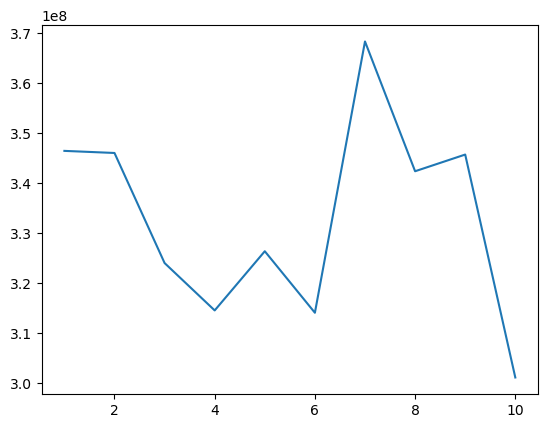

In [ ]:
cond1 = pd.isnull(sale_df['반품_원거래일자'])
sale_df2 = sale_df[cond1]
p1 = sale_df2.pivot_table(index='월',values='구매금액',aggfunc='sum')
plt.plot(p1['구매금액'])

In [ ]:
df = pd.merge(sale_df,member,on='회원번호',how = 'left')

In [ ]:
df['모바일알람여부'].replace('.','미수신',inplace=True)

In [ ]:
pd.to_datetime(df['공급일자']).dt.isocalendar()

,year,week,day
0,2021,52,6
1,2021,52,6
2,2021,52,6
3,2021,52,6
4,2021,52,6
...,...,...,...
294640,2022,43,7
294641,2022,43,7
294642,2022,43,7
294643,2022,43,7


In [ ]:
df['공급일자2'] = pd.to_datetime(df['공급일자'])
df['월'] = pd.to_datetime(df['공급일자']).dt.month
df['요일'] = pd.to_datetime(df['공급일자']).dt.day_name()
# df['주차'] = pd.to_datetime(df['공급일자']).dt.isocalendar()
df['구매시간'] = pd.to_datetime(df['구매시각'],format='%H:%M').dt.hour
df

,공급일자,회원번호,조합원상태_x,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,...,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,공급일자2,월,요일,구매시간
0,2022-01-01,272369856,정상회원,과실,과일,사과,사과/유(1.5kg),1.0,22207,매장C,...,수지구-풍덕천동,여,45.0,미신청,수신,VIP,2022-01-01,1,Saturday,10
1,2022-01-01,1476143616,정상회원,간식,빵,"식빵, 식사대용",아침빵(240g/8개)/매장,1.0,4403,매장C,...,수지구-풍덕천동,여,34.0,미신청,미수신,normal,2022-01-01,1,Saturday,10
2,2022-01-01,743192512,정상회원,채소,양념채소,생강,생강(300g),1.0,7083,매장C,...,수지구-성복동,여,51.0,신청,미수신,normal,2022-01-01,1,Saturday,10
3,2022-01-01,176912064,정상회원,축산물,유제품,우유/산양유,유기농저지방우유(종이팩/900ml),1.0,7849,매장C,...,수지구-풍덕천동,여,69.0,미신청,미수신,VIP,2022-01-01,1,Saturday,10
4,2022-01-01,87592064,정상회원,양념/가루,가루,양념가루,카레(매운맛: 100g),3.0,15507,매장C,...,수지구-풍덕천동,여,73.0,미신청,미수신,normal,2022-01-01,1,Saturday,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294640,2022-10-30,1110819712,정상회원,채소,뿌리채소,무,무(0.7~1kg미만),1.0,2680,매장A,...,수지구-기타,여,50.0,미신청,미수신,normal,2022-10-30,10,Sunday,13
294641,2022-10-30,1517953728,정상회원,채소,양념채소,쪽파,쪽파(500g),1.0,4212,매장A,...,수지구-동천동,남,44.0,미신청,미수신,normal,2022-10-30,10,Sunday,10
294642,2022-10-30,713691392,정상회원,반찬,밑반찬,조림,우엉조림(반찬용/150g),1.0,7658,매장A,...,수지구-동천동,여,49.0,신청,미수신,normal,2022-10-30,10,Sunday,14
294643,2022-10-30,247926336,정상회원,간식,빵,건강곡물빵,감자바게트(180g)/매장,1.0,5169,매장A,...,수지구-동천동,남,63.0,미신청,미수신,normal,2022-10-30,10,Sunday,16


In [ ]:
df['label'] = 1
p1 = df.pivot_table(index=['회원번호','공급일자'], values='label', aggfunc='min').reset_index()
p2 = p1.pivot_table(index='회원번호', values='label', aggfunc='sum').reset_index()
df2 = pd.merge(df,p2,on='회원번호',how='left').rename(columns={'label_y':'총구매횟수'})

In [ ]:
p1 = df2.groupby('요일')['구매금액'].sum().reset_index()
px.bar(p1,x = '요일',y = '구매금액')

In [ ]:
p1 = df2.pivot_table(index='공급일자2',values='구매금액',aggfunc='sum')
p2 = df2.pivot_table(index='월',values='구매금액',aggfunc='sum')

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

In [ ]:
model = ARIMA(p1['구매금액'].values,order=(0,1,2))
model_fit = model.fit()

In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  295
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -4877.631
Date:                Wed, 29 May 2024   AIC                           9761.263
Time:                        21:58:45   BIC                           9772.313
Sample:                             0   HQIC                          9765.688
                                - 295                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9164      0.050    -18.181      0.000      -1.015      -0.818
ma.L2         -0.0806      0.040     -1.991      0.046      -0.160      -0.001
sigma2      1.709e+13   1.06e-15   1.61e+28      0.000    1.71e+13    1.71e+13
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              1424.48
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               1.49   Skew:                             2.25
Prob(H) (two-sided):                  0.05   Kurtosis:                        12.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.8e+42. Standard errors may be unstable.
"""

In [ ]:
import matplotlib.pyplot as plt
forecast_steps = 20  # 예측 스텝 수
forecast = model_fit.pred(steps=forecast_steps)
forecast,df.index
# 예측값에 해당하는 시간 인덱스 생성
forecast_index = pd.date_range(start=df.index[-1], periods=forecast_steps+1, freq='D', tz='UTC')[1:]

# 원래 데이터와 예측값 시각화
plt.plot(df.index, df['Close'], label='Actual')
plt.plot(forecast_index, forecast, label='forecast', color='red')
plt.legend()
plt.show()

AttributeError: 'ARIMAResults' object has no attribute 'pred'

# 시계열

In [ ]:
import pmdarima as pm
from pmdarima.arima import ndiffs
data = p2['구매금액']
n_diffs = ndiffs(data, alpha=0.05, test='adf', max_d=6)
print(f"추정된 차수 d = {n_diffs}") # 결과
# 추정된 차수 d = 1

추정된 차수 d = 3


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

In [ ]:
model = ARIMA(p2['구매금액'].values,order=(0,1,0))
model_fit = model.fit()
# forecast_steps = 5
# forecast = model_fit.forecast(steps = forecast_steps)
# forecast, p2['구매금액'][-5:].values

In [ ]:
model = ARIMA(p2['구매금액'], order=(0,1,0))
model_fit = model.fit()
predictions = model_fit.predict(start=len(p2['구매금액']), end=len(p2['구매금액']) + 10)

c:\Users\lhybi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\Users\lhybi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\Users\lhybi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\Users\lhybi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

c:\Users\lhybi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



In [ ]:
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   구매금액   No. Observations:                   10
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -166.333
Date:                Tue, 28 May 2024   AIC                            334.666
Time:                        22:03:22   BIC                            334.863
Sample:                             0   HQIC                           334.240
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      5.916e+14   2.59e+14      2.287      0.022    8.47e+13     1.1e+15
===================================================================================
Ljung-Box (L1) (Q):                   1.89   Jarque-Bera (JB):                 1.48
Prob(Q):                              0.17   Prob(JB):                         0.48
Heteroskedasticity (H):               5.51   Skew:                             0.94
Prob(H) (two-sided):                  0.19   Kurtosis:                         3.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

c:\Users\lhybi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



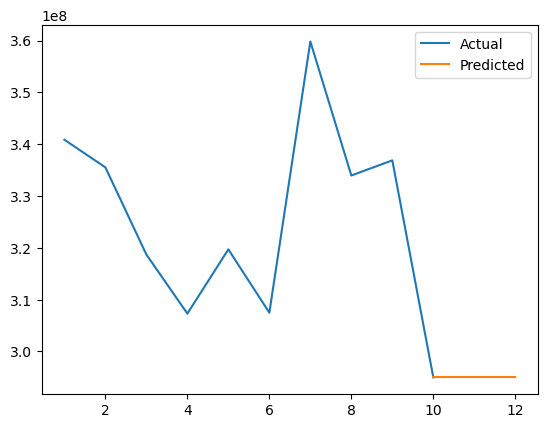

In [ ]:
predictions = model_fit.predict(start=len(p2), end=len(p2) + 2)
plt.plot(p2['구매금액'], label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()

In [ ]:
len(p2)

10

In [ ]:
def forecast_n_step(model, n = 1):
    fc, conf_int = model.predict(n_periods=n, return_conf_int=True)
    # print("fc", fc,"conf_int", conf_int)
    return (
        fc.tolist()[0:n], np.asarray(conf_int).tolist()[0:n]
   )

def forecast(len, model, index, data=None):
    y_pred = []
    pred_upper = []
    pred_lower = []

    if data is not None:
        for new_ob in data:
            fc, conf = forecast_n_step(model)
            y_pred.append(fc[0])
            pred_upper.append(conf[0][1])
            pred_lower.append(conf[0][0])
            model.update(new_ob)
    else:
        for i in range(len):
            fc, conf = forecast_n_step(model)
            y_pred.append(fc[0])
            pred_upper.append(conf[0][1])
            pred_lower.append(conf[0][0])
            model.update(fc[0])
    return pd.Series(y_pred, index=index), pred_upper, pred_lower

In [ ]:
# Forecast 
fc, upper, lower = forecast(len(p1), model_fit, p1.index, data = p1)

# pandas series 생성
# fc # 예측결과
lower_series = pd.Series(lower, index=p1.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(upper, index=p1.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(20,6))
plt.plot(p1, label='train_data')
# plt.plot(test_data, c='b', label='test_data (actual price)')
plt.plot(fc, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend(loc='upper left')
plt.show()

ValueError: too many values to unpack (expected 2)

In [ ]:
model = ARIMA(p1['구매금액'], order=(0,1,0))
model_fit = model.fit()
predictions = model_fit.predict(start=p1.index, end=len(p1) + 2)

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


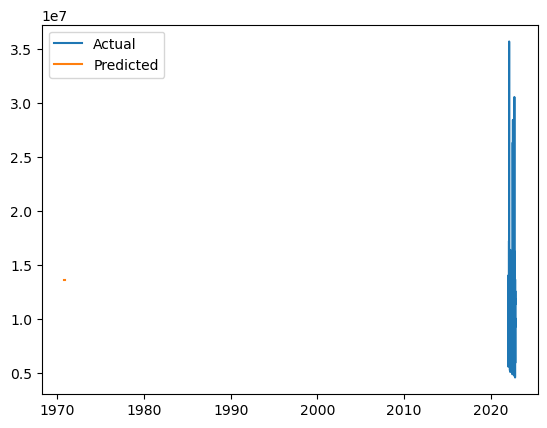

In [ ]:
plt.plot(p1, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()

In [ ]:
model.plot_diagnostics(figsize=(16,8))
plt.show()

AttributeError: 'ARIMA' object has no attribute 'plot_diagnostics'

# 시계열2

In [ ]:
p2.index = ['2022-01-01','2022-02-01','2022-03-01','2022-04-01','2022-05-01','2022-06-01','2022-07-01','2022-08-01','2022-09-01','2022-10-01']

In [ ]:
train_data, test_data = p1[:int(len(p1)*0.9)], p1[int(len(p1)*0.9):]

In [ ]:
len(train_data), len(test_data)

(265, 30)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

model_fit = pm.auto_arima(
    	    y=p2['구매금액'], 
 	        d=n_diffs , 
            start_p=0, max_p=2, 
            start_q=0, max_q=2, 
            m=1, seasonal=False, # 계절성이 없음!
            stepwise=True,
            trace=True
)
print(model_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(0,3,0)(0,0,0)[0]             : AIC=277.641, Time=0.03 sec
 ARIMA(1,3,0)(0,0,0)[0]             : AIC=288.308, Time=0.03 sec
 ARIMA(0,3,1)(0,0,0)[0]             : AIC=276.953, Time=0.05 sec
 ARIMA(1,3,1)(0,0,0)[0]             : AIC=267.616, Time=0.04 sec
 ARIMA(2,3,1)(0,0,0)[0]             : AIC=268.683, Time=0.06 sec
 ARIMA(1,3,2)(0,0,0)[0]             : AIC=277.392, Time=0.06 sec
 ARIMA(0,3,2)(0,0,0)[0]             : AIC=275.965, Time=0.03 sec
 ARIMA(2,3,0)(0,0,0)[0]             : AIC=294.173, Time=0.04 sec
 ARIMA(2,3,2)(0,0,0)[0]             : AIC=279.146, Time=0.08 sec
 ARIMA(1,3,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec

Best model:  ARIMA(1,3,1)(0,0,0)[0]          
Total fit time: 0.482 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   10
Model:               SARIMAX(1, 3, 1)   Log Likelihood                -130.8

In [ ]:
# forecast 함수
def forecast_n_step(model, n = 1):
    fc, conf_int = model.predict(n_periods=n, return_conf_int=True)
    # print("fc", fc,"conf_int", conf_int)
    return (
        fc.tolist()[0:n], np.asarray(conf_int).tolist()[0:n]
   )

def forecast(len, model, index, data=None):
    y_pred = []
    pred_upper = []
    pred_lower = []

    if data is not None:
        for new_ob in data:
            fc, conf = forecast_n_step(model)
            y_pred.append(fc[0])
            pred_upper.append(conf[0][1])
            pred_lower.append(conf[0][0])
            model.update(new_ob)
    else:
        for i in range(len):
            fc, conf = forecast_n_step(model)
            y_pred.append(fc[0])
            pred_upper.append(conf[0][1])
            pred_lower.append(conf[0][0])
            model.update(fc[0])
    return pd.Series(y_pred, index=index), pred_upper, pred_lower

In [ ]:
fc

월
1     2.854373e+08
2     3.017900e+08
3     3.772055e+08
4     3.085789e+08
5     2.899255e+08
6     3.148775e+08
7     3.131175e+08
8     3.643710e+08
9     3.752146e+08
10    3.166825e+08
dtype: float64

ConversionError: Failed to convert value(s) to axis units: array(['2022-01-01T00:00:00.000000000', '2022-01-02T00:00:00.000000000',
       '2022-01-03T00:00:00.000000000', '2022-01-04T00:00:00.000000000',
       '2022-01-05T00:00:00.000000000', '2022-01-06T00:00:00.000000000',
       '2022-01-07T00:00:00.000000000', '2022-01-08T00:00:00.000000000',
       '2022-01-09T00:00:00.000000000', '2022-01-10T00:00:00.000000000',
       '2022-01-11T00:00:00.000000000', '2022-01-12T00:00:00.000000000',
       '2022-01-13T00:00:00.000000000', '2022-01-14T00:00:00.000000000',
       '2022-01-15T00:00:00.000000000', '2022-01-16T00:00:00.000000000',
       '2022-01-17T00:00:00.000000000', '2022-01-18T00:00:00.000000000',
       '2022-01-19T00:00:00.000000000', '2022-01-20T00:00:00.000000000',
       '2022-01-21T00:00:00.000000000', '2022-01-22T00:00:00.000000000',
       '2022-01-23T00:00:00.000000000', '2022-01-24T00:00:00.000000000',
       '2022-01-25T00:00:00.000000000', '2022-01-26T00:00:00.000000000',
       '2022-01-27T00:00:00.000000000', '2022-01-28T00:00:00.000000000',
       '2022-01-29T00:00:00.000000000', '2022-01-30T00:00:00.000000000',
       '2022-01-31T00:00:00.000000000', '2022-02-01T00:00:00.000000000',
       '2022-02-02T00:00:00.000000000', '2022-02-03T00:00:00.000000000',
       '2022-02-04T00:00:00.000000000', '2022-02-05T00:00:00.000000000',
       '2022-02-06T00:00:00.000000000', '2022-02-07T00:00:00.000000000',
       '2022-02-08T00:00:00.000000000', '2022-02-09T00:00:00.000000000',
       '2022-02-10T00:00:00.000000000', '2022-02-11T00:00:00.000000000',
       '2022-02-12T00:00:00.000000000', '2022-02-13T00:00:00.000000000',
       '2022-02-14T00:00:00.000000000', '2022-02-18T00:00:00.000000000',
       '2022-02-19T00:00:00.000000000', '2022-02-20T00:00:00.000000000',
       '2022-02-21T00:00:00.000000000', '2022-02-22T00:00:00.000000000',
       '2022-02-23T00:00:00.000000000', '2022-02-24T00:00:00.000000000',
       '2022-02-25T00:00:00.000000000', '2022-02-26T00:00:00.000000000',
       '2022-02-27T00:00:00.000000000', '2022-02-28T00:00:00.000000000',
       '2022-03-01T00:00:00.000000000', '2022-03-02T00:00:00.000000000',
       '2022-03-03T00:00:00.000000000', '2022-03-04T00:00:00.000000000',
       '2022-03-05T00:00:00.000000000', '2022-03-06T00:00:00.000000000',
       '2022-03-07T00:00:00.000000000', '2022-03-08T00:00:00.000000000',
       '2022-03-09T00:00:00.000000000', '2022-03-10T00:00:00.000000000',
       '2022-03-11T00:00:00.000000000', '2022-03-12T00:00:00.000000000',
       '2022-03-13T00:00:00.000000000', '2022-03-14T00:00:00.000000000',
       '2022-03-15T00:00:00.000000000', '2022-03-16T00:00:00.000000000',
       '2022-03-17T00:00:00.000000000', '2022-03-18T00:00:00.000000000',
       '2022-03-19T00:00:00.000000000', '2022-03-20T00:00:00.000000000',
       '2022-03-21T00:00:00.000000000', '2022-03-22T00:00:00.000000000',
       '2022-03-23T00:00:00.000000000', '2022-03-24T00:00:00.000000000',
       '2022-03-25T00:00:00.000000000', '2022-03-26T00:00:00.000000000',
       '2022-03-27T00:00:00.000000000', '2022-03-28T00:00:00.000000000',
       '2022-03-29T00:00:00.000000000', '2022-03-30T00:00:00.000000000',
       '2022-03-31T00:00:00.000000000', '2022-04-01T00:00:00.000000000',
       '2022-04-02T00:00:00.000000000', '2022-04-03T00:00:00.000000000',
       '2022-04-04T00:00:00.000000000', '2022-04-05T00:00:00.000000000',
       '2022-04-06T00:00:00.000000000', '2022-04-07T00:00:00.000000000',
       '2022-04-08T00:00:00.000000000', '2022-04-09T00:00:00.000000000',
       '2022-04-10T00:00:00.000000000', '2022-04-11T00:00:00.000000000',
       '2022-04-12T00:00:00.000000000', '2022-04-13T00:00:00.000000000',
       '2022-04-14T00:00:00.000000000', '2022-04-15T00:00:00.000000000',
       '2022-04-16T00:00:00.000000000', '2022-04-17T00:00:00.000000000',
       '2022-04-18T00:00:00.000000000', '2022-04-19T00:00:00.000000000',
       '2022-04-20T00:00:00.000000000', '2022-04-21T00:00:00.000000000',
       '2022-04-22T00:00:00.000000000', '2022-04-23T00:00:00.000000000',
       '2022-04-24T00:00:00.000000000', '2022-04-25T00:00:00.000000000',
       '2022-04-26T00:00:00.000000000', '2022-04-27T00:00:00.000000000',
       '2022-04-28T00:00:00.000000000', '2022-04-29T00:00:00.000000000',
       '2022-04-30T00:00:00.000000000', '2022-05-01T00:00:00.000000000',
       '2022-05-02T00:00:00.000000000', '2022-05-03T00:00:00.000000000',
       '2022-05-05T00:00:00.000000000', '2022-05-06T00:00:00.000000000',
       '2022-05-07T00:00:00.000000000', '2022-05-08T00:00:00.000000000',
       '2022-05-09T00:00:00.000000000', '2022-05-10T00:00:00.000000000',
       '2022-05-11T00:00:00.000000000', '2022-05-12T00:00:00.000000000',
       '2022-05-13T00:00:00.000000000', '2022-05-14T00:00:00.000000000',
       '2022-05-15T00:00:00.000000000', '2022-05-16T00:00:00.000000000',
       '2022-05-17T00:00:00.000000000', '2022-05-18T00:00:00.000000000',
       '2022-05-19T00:00:00.000000000', '2022-05-20T00:00:00.000000000',
       '2022-05-21T00:00:00.000000000', '2022-05-22T00:00:00.000000000',
       '2022-05-23T00:00:00.000000000', '2022-05-24T00:00:00.000000000',
       '2022-05-25T00:00:00.000000000', '2022-05-26T00:00:00.000000000',
       '2022-05-27T00:00:00.000000000', '2022-05-28T00:00:00.000000000',
       '2022-05-29T00:00:00.000000000', '2022-05-30T00:00:00.000000000',
       '2022-05-31T00:00:00.000000000', '2022-06-01T00:00:00.000000000',
       '2022-06-02T00:00:00.000000000', '2022-06-03T00:00:00.000000000',
       '2022-06-04T00:00:00.000000000', '2022-06-05T00:00:00.000000000',
       '2022-06-06T00:00:00.000000000', '2022-06-07T00:00:00.000000000',
       '2022-06-08T00:00:00.000000000', '2022-06-09T00:00:00.000000000',
       '2022-06-10T00:00:00.000000000', '2022-06-11T00:00:00.000000000',
       '2022-06-13T00:00:00.000000000', '2022-06-14T00:00:00.000000000',
       '2022-06-15T00:00:00.000000000', '2022-06-16T00:00:00.000000000',
       '2022-06-17T00:00:00.000000000', '2022-06-18T00:00:00.000000000',
       '2022-06-19T00:00:00.000000000', '2022-06-20T00:00:00.000000000',
       '2022-06-21T00:00:00.000000000', '2022-06-22T00:00:00.000000000',
       '2022-06-23T00:00:00.000000000', '2022-06-24T00:00:00.000000000',
       '2022-06-25T00:00:00.000000000', '2022-06-26T00:00:00.000000000',
       '2022-06-27T00:00:00.000000000', '2022-06-28T00:00:00.000000000',
       '2022-06-29T00:00:00.000000000', '2022-06-30T00:00:00.000000000',
       '2022-07-01T00:00:00.000000000', '2022-07-02T00:00:00.000000000',
       '2022-07-03T00:00:00.000000000', '2022-07-04T00:00:00.000000000',
       '2022-07-05T00:00:00.000000000', '2022-07-06T00:00:00.000000000',
       '2022-07-07T00:00:00.000000000', '2022-07-08T00:00:00.000000000',
       '2022-07-09T00:00:00.000000000', '2022-07-10T00:00:00.000000000',
       '2022-07-11T00:00:00.000000000', '2022-07-12T00:00:00.000000000',
       '2022-07-13T00:00:00.000000000', '2022-07-14T00:00:00.000000000',
       '2022-07-15T00:00:00.000000000', '2022-07-16T00:00:00.000000000',
       '2022-07-17T00:00:00.000000000', '2022-07-18T00:00:00.000000000',
       '2022-07-19T00:00:00.000000000', '2022-07-20T00:00:00.000000000',
       '2022-07-21T00:00:00.000000000', '2022-07-22T00:00:00.000000000',
       '2022-07-23T00:00:00.000000000', '2022-07-24T00:00:00.000000000',
       '2022-07-25T00:00:00.000000000', '2022-07-26T00:00:00.000000000',
       '2022-07-27T00:00:00.000000000', '2022-07-28T00:00:00.000000000',
       '2022-07-29T00:00:00.000000000', '2022-07-30T00:00:00.000000000',
       '2022-07-31T00:00:00.000000000', '2022-08-01T00:00:00.000000000',
       '2022-08-02T00:00:00.000000000', '2022-08-03T00:00:00.000000000',
       '2022-08-04T00:00:00.000000000', '2022-08-05T00:00:00.000000000',
       '2022-08-06T00:00:00.000000000', '2022-08-07T00:00:00.000000000',
       '2022-08-08T00:00:00.000000000', '2022-08-09T00:00:00.000000000',
       '2022-08-10T00:00:00.000000000', '2022-08-11T00:00:00.000000000',
       '2022-08-12T00:00:00.000000000', '2022-08-13T00:00:00.000000000',
       '2022-08-14T00:00:00.000000000', '2022-08-15T00:00:00.000000000',
       '2022-08-16T00:00:00.000000000', '2022-08-17T00:00:00.000000000',
       '2022-08-18T00:00:00.000000000', '2022-08-19T00:00:00.000000000',
       '2022-08-20T00:00:00.000000000', '2022-08-21T00:00:00.000000000',
       '2022-08-22T00:00:00.000000000', '2022-08-23T00:00:00.000000000',
       '2022-08-24T00:00:00.000000000', '2022-08-25T00:00:00.000000000',
       '2022-08-26T00:00:00.000000000', '2022-08-27T00:00:00.000000000',
       '2022-08-28T00:00:00.000000000', '2022-08-29T00:00:00.000000000',
       '2022-08-30T00:00:00.000000000', '2022-08-31T00:00:00.000000000',
       '2022-09-01T00:00:00.000000000', '2022-09-02T00:00:00.000000000',
       '2022-09-03T00:00:00.000000000', '2022-09-04T00:00:00.000000000',
       '2022-09-05T00:00:00.000000000', '2022-09-06T00:00:00.000000000',
       '2022-09-07T00:00:00.000000000', '2022-09-08T00:00:00.000000000',
       '2022-09-09T00:00:00.000000000', '2022-09-10T00:00:00.000000000',
       '2022-09-11T00:00:00.000000000', '2022-09-12T00:00:00.000000000',
       '2022-09-13T00:00:00.000000000', '2022-09-14T00:00:00.000000000',
       '2022-09-15T00:00:00.000000000', '2022-09-16T00:00:00.000000000',
       '2022-09-17T00:00:00.000000000', '2022-09-18T00:00:00.000000000',
       '2022-09-19T00:00:00.000000000', '2022-09-20T00:00:00.000000000',
       '2022-09-21T00:00:00.000000000', '2022-09-22T00:00:00.000000000',
       '2022-09-26T00:00:00.000000000', '2022-09-27T00:00:00.000000000',
       '2022-09-28T00:00:00.000000000', '2022-09-29T00:00:00.000000000',
       '2022-09-30T00:00:00.000000000'], dtype='datetime64[ns]')

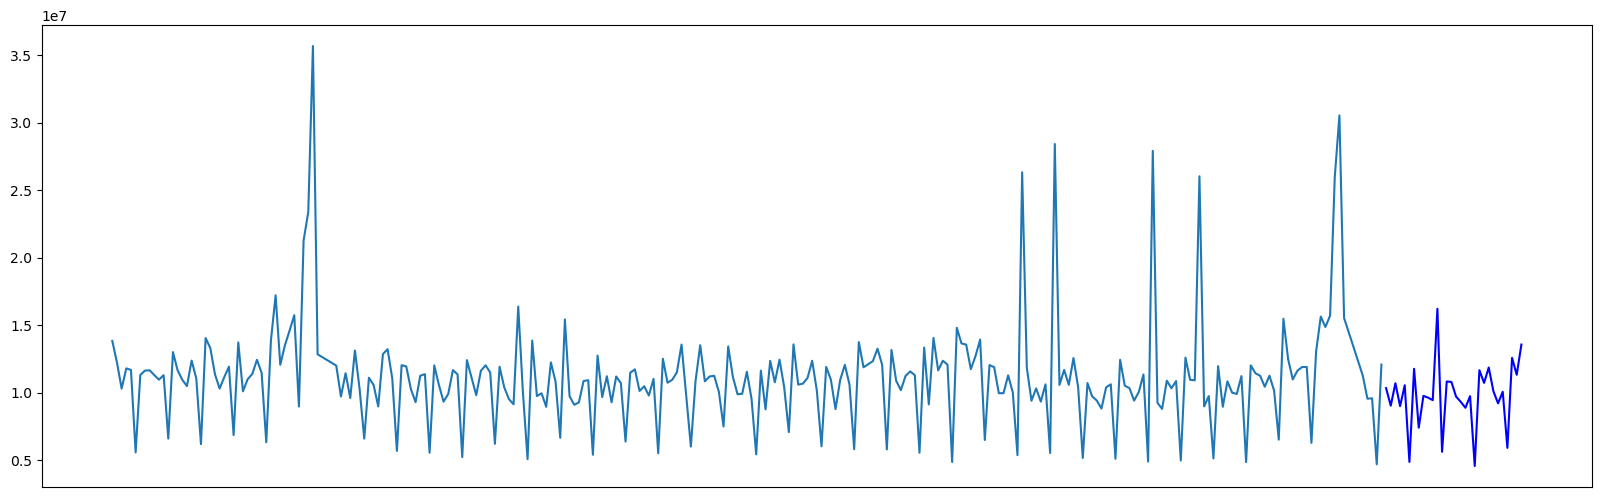

In [ ]:
# Forecast 
fc, upper, lower = forecast(len(p2), model_fit, p2['구매금액'].index, data = p2['구매금액'])

# pandas series 생성
# fc # 예측결과
lower_series = pd.Series(lower, index=p2.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(upper, index=p2.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(20,6))
plt.plot(train_data, label='train_data')
plt.plot(test_data, c='b', label='test_data (actual price)')
plt.plot(fc, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend(loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
mse = mean_squared_error(np.exp(test_data['구매금액']), np.exp(fc))
print('MSE: ', mse)
mae = mean_absolute_error(np.exp(test_data['구매금액']), np.exp(fc))
print('MAE: ', mae)
rmse = math.sqrt(mean_squared_error(np.exp(test_data['구매금액']), np.exp(fc)))
print('RMSE: ', rmse)
mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data['구매금액']))/np.abs(np.exp(test_data['구매금액'])))
print('MAPE: ' ,'{:.2f}%'.format(mape*100))

c:\Users\lhybi\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning:

overflow encountered in exp



ValueError: Input contains infinity or a value too large for dtype('float64').

1년 후 주가
2022-11-01    2.855693e+08
2022-12-01    2.484403e+08
dtype: float64


ConversionError: Failed to convert value(s) to axis units: array(['2022-01-01T00:00:00.000000000', '2022-01-02T00:00:00.000000000',
       '2022-01-03T00:00:00.000000000', '2022-01-04T00:00:00.000000000',
       '2022-01-05T00:00:00.000000000', '2022-01-06T00:00:00.000000000',
       '2022-01-07T00:00:00.000000000', '2022-01-08T00:00:00.000000000',
       '2022-01-09T00:00:00.000000000', '2022-01-10T00:00:00.000000000',
       '2022-01-11T00:00:00.000000000', '2022-01-12T00:00:00.000000000',
       '2022-01-13T00:00:00.000000000', '2022-01-14T00:00:00.000000000',
       '2022-01-15T00:00:00.000000000', '2022-01-16T00:00:00.000000000',
       '2022-01-17T00:00:00.000000000', '2022-01-18T00:00:00.000000000',
       '2022-01-19T00:00:00.000000000', '2022-01-20T00:00:00.000000000',
       '2022-01-21T00:00:00.000000000', '2022-01-22T00:00:00.000000000',
       '2022-01-23T00:00:00.000000000', '2022-01-24T00:00:00.000000000',
       '2022-01-25T00:00:00.000000000', '2022-01-26T00:00:00.000000000',
       '2022-01-27T00:00:00.000000000', '2022-01-28T00:00:00.000000000',
       '2022-01-29T00:00:00.000000000', '2022-01-30T00:00:00.000000000',
       '2022-01-31T00:00:00.000000000', '2022-02-01T00:00:00.000000000',
       '2022-02-02T00:00:00.000000000', '2022-02-03T00:00:00.000000000',
       '2022-02-04T00:00:00.000000000', '2022-02-05T00:00:00.000000000',
       '2022-02-06T00:00:00.000000000', '2022-02-07T00:00:00.000000000',
       '2022-02-08T00:00:00.000000000', '2022-02-09T00:00:00.000000000',
       '2022-02-10T00:00:00.000000000', '2022-02-11T00:00:00.000000000',
       '2022-02-12T00:00:00.000000000', '2022-02-13T00:00:00.000000000',
       '2022-02-14T00:00:00.000000000', '2022-02-18T00:00:00.000000000',
       '2022-02-19T00:00:00.000000000', '2022-02-20T00:00:00.000000000',
       '2022-02-21T00:00:00.000000000', '2022-02-22T00:00:00.000000000',
       '2022-02-23T00:00:00.000000000', '2022-02-24T00:00:00.000000000',
       '2022-02-25T00:00:00.000000000', '2022-02-26T00:00:00.000000000',
       '2022-02-27T00:00:00.000000000', '2022-02-28T00:00:00.000000000',
       '2022-03-01T00:00:00.000000000', '2022-03-02T00:00:00.000000000',
       '2022-03-03T00:00:00.000000000', '2022-03-04T00:00:00.000000000',
       '2022-03-05T00:00:00.000000000', '2022-03-06T00:00:00.000000000',
       '2022-03-07T00:00:00.000000000', '2022-03-08T00:00:00.000000000',
       '2022-03-09T00:00:00.000000000', '2022-03-10T00:00:00.000000000',
       '2022-03-11T00:00:00.000000000', '2022-03-12T00:00:00.000000000',
       '2022-03-13T00:00:00.000000000', '2022-03-14T00:00:00.000000000',
       '2022-03-15T00:00:00.000000000', '2022-03-16T00:00:00.000000000',
       '2022-03-17T00:00:00.000000000', '2022-03-18T00:00:00.000000000',
       '2022-03-19T00:00:00.000000000', '2022-03-20T00:00:00.000000000',
       '2022-03-21T00:00:00.000000000', '2022-03-22T00:00:00.000000000',
       '2022-03-23T00:00:00.000000000', '2022-03-24T00:00:00.000000000',
       '2022-03-25T00:00:00.000000000', '2022-03-26T00:00:00.000000000',
       '2022-03-27T00:00:00.000000000', '2022-03-28T00:00:00.000000000',
       '2022-03-29T00:00:00.000000000', '2022-03-30T00:00:00.000000000',
       '2022-03-31T00:00:00.000000000', '2022-04-01T00:00:00.000000000',
       '2022-04-02T00:00:00.000000000', '2022-04-03T00:00:00.000000000',
       '2022-04-04T00:00:00.000000000', '2022-04-05T00:00:00.000000000',
       '2022-04-06T00:00:00.000000000', '2022-04-07T00:00:00.000000000',
       '2022-04-08T00:00:00.000000000', '2022-04-09T00:00:00.000000000',
       '2022-04-10T00:00:00.000000000', '2022-04-11T00:00:00.000000000',
       '2022-04-12T00:00:00.000000000', '2022-04-13T00:00:00.000000000',
       '2022-04-14T00:00:00.000000000', '2022-04-15T00:00:00.000000000',
       '2022-04-16T00:00:00.000000000', '2022-04-17T00:00:00.000000000',
       '2022-04-18T00:00:00.000000000', '2022-04-19T00:00:00.000000000',
       '2022-04-20T00:00:00.000000000', '2022-04-21T00:00:00.000000000',
       '2022-04-22T00:00:00.000000000', '2022-04-23T00:00:00.000000000',
       '2022-04-24T00:00:00.000000000', '2022-04-25T00:00:00.000000000',
       '2022-04-26T00:00:00.000000000', '2022-04-27T00:00:00.000000000',
       '2022-04-28T00:00:00.000000000', '2022-04-29T00:00:00.000000000',
       '2022-04-30T00:00:00.000000000', '2022-05-01T00:00:00.000000000',
       '2022-05-02T00:00:00.000000000', '2022-05-03T00:00:00.000000000',
       '2022-05-05T00:00:00.000000000', '2022-05-06T00:00:00.000000000',
       '2022-05-07T00:00:00.000000000', '2022-05-08T00:00:00.000000000',
       '2022-05-09T00:00:00.000000000', '2022-05-10T00:00:00.000000000',
       '2022-05-11T00:00:00.000000000', '2022-05-12T00:00:00.000000000',
       '2022-05-13T00:00:00.000000000', '2022-05-14T00:00:00.000000000',
       '2022-05-15T00:00:00.000000000', '2022-05-16T00:00:00.000000000',
       '2022-05-17T00:00:00.000000000', '2022-05-18T00:00:00.000000000',
       '2022-05-19T00:00:00.000000000', '2022-05-20T00:00:00.000000000',
       '2022-05-21T00:00:00.000000000', '2022-05-22T00:00:00.000000000',
       '2022-05-23T00:00:00.000000000', '2022-05-24T00:00:00.000000000',
       '2022-05-25T00:00:00.000000000', '2022-05-26T00:00:00.000000000',
       '2022-05-27T00:00:00.000000000', '2022-05-28T00:00:00.000000000',
       '2022-05-29T00:00:00.000000000', '2022-05-30T00:00:00.000000000',
       '2022-05-31T00:00:00.000000000', '2022-06-01T00:00:00.000000000',
       '2022-06-02T00:00:00.000000000', '2022-06-03T00:00:00.000000000',
       '2022-06-04T00:00:00.000000000', '2022-06-05T00:00:00.000000000',
       '2022-06-06T00:00:00.000000000', '2022-06-07T00:00:00.000000000',
       '2022-06-08T00:00:00.000000000', '2022-06-09T00:00:00.000000000',
       '2022-06-10T00:00:00.000000000', '2022-06-11T00:00:00.000000000',
       '2022-06-13T00:00:00.000000000', '2022-06-14T00:00:00.000000000',
       '2022-06-15T00:00:00.000000000', '2022-06-16T00:00:00.000000000',
       '2022-06-17T00:00:00.000000000', '2022-06-18T00:00:00.000000000',
       '2022-06-19T00:00:00.000000000', '2022-06-20T00:00:00.000000000',
       '2022-06-21T00:00:00.000000000', '2022-06-22T00:00:00.000000000',
       '2022-06-23T00:00:00.000000000', '2022-06-24T00:00:00.000000000',
       '2022-06-25T00:00:00.000000000', '2022-06-26T00:00:00.000000000',
       '2022-06-27T00:00:00.000000000', '2022-06-28T00:00:00.000000000',
       '2022-06-29T00:00:00.000000000', '2022-06-30T00:00:00.000000000',
       '2022-07-01T00:00:00.000000000', '2022-07-02T00:00:00.000000000',
       '2022-07-03T00:00:00.000000000', '2022-07-04T00:00:00.000000000',
       '2022-07-05T00:00:00.000000000', '2022-07-06T00:00:00.000000000',
       '2022-07-07T00:00:00.000000000', '2022-07-08T00:00:00.000000000',
       '2022-07-09T00:00:00.000000000', '2022-07-10T00:00:00.000000000',
       '2022-07-11T00:00:00.000000000', '2022-07-12T00:00:00.000000000',
       '2022-07-13T00:00:00.000000000', '2022-07-14T00:00:00.000000000',
       '2022-07-15T00:00:00.000000000', '2022-07-16T00:00:00.000000000',
       '2022-07-17T00:00:00.000000000', '2022-07-18T00:00:00.000000000',
       '2022-07-19T00:00:00.000000000', '2022-07-20T00:00:00.000000000',
       '2022-07-21T00:00:00.000000000', '2022-07-22T00:00:00.000000000',
       '2022-07-23T00:00:00.000000000', '2022-07-24T00:00:00.000000000',
       '2022-07-25T00:00:00.000000000', '2022-07-26T00:00:00.000000000',
       '2022-07-27T00:00:00.000000000', '2022-07-28T00:00:00.000000000',
       '2022-07-29T00:00:00.000000000', '2022-07-30T00:00:00.000000000',
       '2022-07-31T00:00:00.000000000', '2022-08-01T00:00:00.000000000',
       '2022-08-02T00:00:00.000000000', '2022-08-03T00:00:00.000000000',
       '2022-08-04T00:00:00.000000000', '2022-08-05T00:00:00.000000000',
       '2022-08-06T00:00:00.000000000', '2022-08-07T00:00:00.000000000',
       '2022-08-08T00:00:00.000000000', '2022-08-09T00:00:00.000000000',
       '2022-08-10T00:00:00.000000000', '2022-08-11T00:00:00.000000000',
       '2022-08-12T00:00:00.000000000', '2022-08-13T00:00:00.000000000',
       '2022-08-14T00:00:00.000000000', '2022-08-15T00:00:00.000000000',
       '2022-08-16T00:00:00.000000000', '2022-08-17T00:00:00.000000000',
       '2022-08-18T00:00:00.000000000', '2022-08-19T00:00:00.000000000',
       '2022-08-20T00:00:00.000000000', '2022-08-21T00:00:00.000000000',
       '2022-08-22T00:00:00.000000000', '2022-08-23T00:00:00.000000000',
       '2022-08-24T00:00:00.000000000', '2022-08-25T00:00:00.000000000',
       '2022-08-26T00:00:00.000000000', '2022-08-27T00:00:00.000000000',
       '2022-08-28T00:00:00.000000000', '2022-08-29T00:00:00.000000000',
       '2022-08-30T00:00:00.000000000', '2022-08-31T00:00:00.000000000',
       '2022-09-01T00:00:00.000000000', '2022-09-02T00:00:00.000000000',
       '2022-09-03T00:00:00.000000000', '2022-09-04T00:00:00.000000000',
       '2022-09-05T00:00:00.000000000', '2022-09-06T00:00:00.000000000',
       '2022-09-07T00:00:00.000000000', '2022-09-08T00:00:00.000000000',
       '2022-09-09T00:00:00.000000000', '2022-09-10T00:00:00.000000000',
       '2022-09-11T00:00:00.000000000', '2022-09-12T00:00:00.000000000',
       '2022-09-13T00:00:00.000000000', '2022-09-14T00:00:00.000000000',
       '2022-09-15T00:00:00.000000000', '2022-09-16T00:00:00.000000000',
       '2022-09-17T00:00:00.000000000', '2022-09-18T00:00:00.000000000',
       '2022-09-19T00:00:00.000000000', '2022-09-20T00:00:00.000000000',
       '2022-09-21T00:00:00.000000000', '2022-09-22T00:00:00.000000000',
       '2022-09-26T00:00:00.000000000', '2022-09-27T00:00:00.000000000',
       '2022-09-28T00:00:00.000000000', '2022-09-29T00:00:00.000000000',
       '2022-09-30T00:00:00.000000000'], dtype='datetime64[ns]')

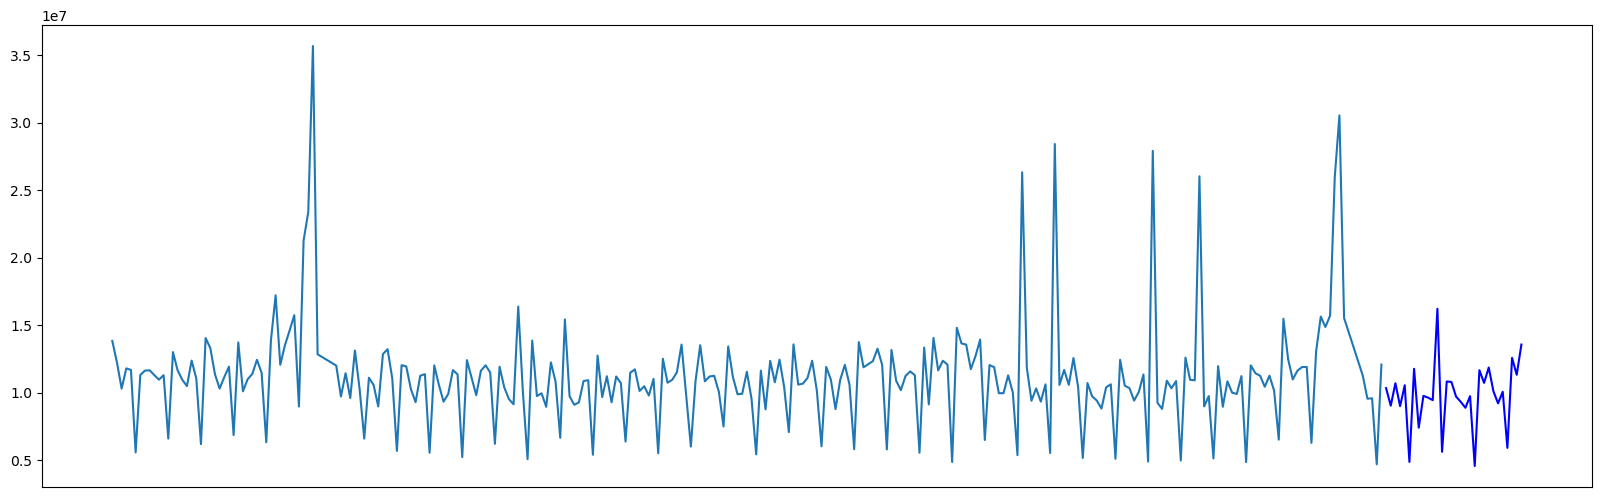

In [ ]:
date_index = ["2022-11-01","2022-12-01"]
fc2, upper2, lower2 = forecast(len(date_index), model_fit, date_index)
print('1년 후 주가') 
print(fc2.tail())
# fc2, conf = forecast_n_step(model_fit, len(date_list))
lower_series2 = pd.Series(lower2, index=date_index)  # 예측결과의 하한 바운드
upper_series2 = pd.Series(upper2, index=date_index)  # 예측결과의 상한 바운드
# plot
plt.figure(figsize=(20,6))
plt.plot(train_data, label='original')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc, c='r',label='predicted price')
plt.plot(fc2, c='g',label='forward predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.fill_between(lower_series2.index, lower_series2, upper_series2, color='k', alpha=.10)
plt.title('After 1 year')
plt.legend(loc='upper left')
plt.show()

# 구매물품별 자료

In [ ]:
p1 = df2.pivot_table(index = ['월','물품소분류'],values='구매수량',aggfunc='sum').sort_values('구매수량',ascending=False).reset_index()
p1

,월,물품소분류,구매수량
0,3,두부,2701.0
1,1,두부,2662.0
2,4,두부,2486.0
3,5,두부,2407.0
4,9,두부,2402.0
...,...,...,...
2943,6,단호박/손질,-1.0
2944,5,상황버섯,-1.0
2945,1,초석잠,-1.0
2946,2,말린삼잎국화나물,-2.0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False


['두부', '유정란', '스낵', '김가공', '콩나물', '우유/산양유', '과즙', '대파', '양파', '가래떡', '시금치', '당근', '라면', '김', '즉석떡', '논지엠오유정란', '패류/갑각류', '식사대용/기타', '냉동생선', '딸기', '요구르트', '식빵, 식사대용', '월동무', '추출/농축액', '어묵', '돼지(중량)', '무항생제닭', '멥쌀', '햄/소시지/훈제', '만두', '프리믹스', '미역/다시마', '사과', '귤(조생)', '식육추출가공', '돈가스/분쇄가공', '기름', '멸치류', '피자/핫도그', '보리살림(냉장)', '감자', '한우', '한우(중량)', '앙금크림빵', '기타양념', '단과자빵', '죽', '팽이버섯', '엿/양갱/기타', '보리살림돼지', '기타냉동수산', '절임', '곡류차', '두유', '휴지', '장류/기타', '양념가루', '양배추', '푸딩', '묵', '치약/칫솔', '곡식가루', '찐빵,호떡,전통', '한우(냉장)', '봄동', '아이스크림', '화본', '깻잎', '고구마', '상추', '간편조리면', '수산가공반찬', '배추', '한과/유과', '기초화장품', '새송이버섯', '쌈채소모음', '음료기타', '어류/연체류', '숙주나물', '양송이버섯', '잼', '콩가공/기타', '어린잎채소', '소스', '기타건어류', '애호박', '생물해조류', '호박고구마', '콩', '젓갈/액젓', '단감', '느타리버섯', '국수', '깐마늘', '과채가루', '간장', '황태류', '생채', '유기한우', '절임차', '세탁비누', '면/기타', '세안제/팩', '생숙면', '간편요리', '브로컬리', '세안비누', '찹쌀', '국/탕(수산)', '양상추', '표고버섯', '연근', '귤만감', '연근채/세척', '주방용비누', '씨리얼', '콜라비', '조림', '뿌리차', '무항생제돼지', '세발나물', '오징어류', '유부', '배', '무시래기(100g)', '우엉', 

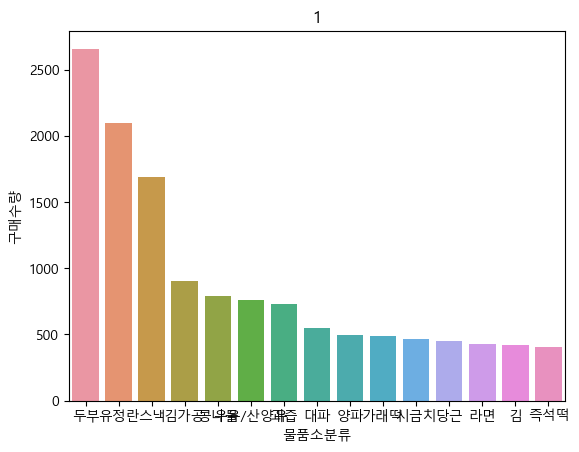

['두부', '유정란', '스낵', '콩나물', '김가공', '대파', '우유/산양유', '과즙', '가래떡', '시금치', '양파', '만두', '월동무', '딸기', '냉동생선', '한과/유과', '라면', '당근', '기름', '한우', '즉석떡', '논지엠오유정란', '멥쌀', '식육추출가공', '감자', '식사대용/기타', '패류/갑각류', '어묵', '무항생제닭', '사과', '요구르트', '추출/농축액', '식빵, 식사대용', '김', '돼지(중량)', '음료기타', '미역/다시마', '숙주나물', '기타양념', '화본', '햄/소시지/훈제', '돈가스/분쇄가공', '보리살림돼지', '보리살림(냉장)', '프리믹스', '팽이버섯', '양배추', '한우(중량)', '면/기타', '단과자빵', '땅콩', '기타냉동수산', '곡식가루', '두유', '콩', '간편요리', '절임', '앙금크림빵', '브로컬리', '멸치류', '고구마', '황태류', '한우(냉장)', '휴지', '장류/기타', '묵', '곡류차', '엿/양갱/기타', '기초화장품', '푸딩', '쌈채소모음', '양념가루', '호박고구마', '느타리버섯', '죽', '피자/핫도그', '잼', '새송이버섯', '어린잎채소', '찹쌀', '쪽파', '깐마늘', '배', '찐빵,호떡,전통', '아이스크림', '치약/칫솔', '간장', '양송이버섯', '콩가공/기타', '도라지/손질', '과채가루', '단감', '국/탕(수산)', '기타건어류', '쑥', '밤', '혼합곡', '생채', '세탁비누', '양상추', '젓갈/액젓', '국수', '세안제/팩', '삶은고사리/손질', '귤만감', '소스', '도라지', '표고버섯', '생물해조류', '애호박', '주방용비누', '청경채', '봄동', '수산가공반찬', '상추', '깻잎', '세안비누', '가공소금', '간편조리면', '무시래기(100g)', '무항생제돼지', '어류/연체류', '대파/손질', '냉이', '씨리얼', '배추', '오징어류',

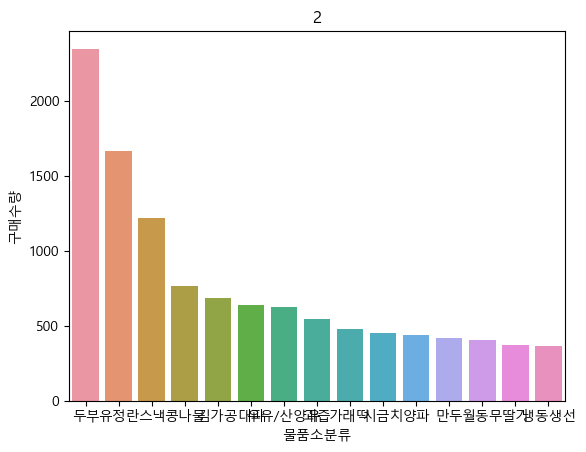

['두부', '유정란', '스낵', '콩나물', '과즙', '우유/산양유', '김가공', '대파', '양파', '무항생제닭', '당근', '딸기', '논지엠오유정란', '브로컬리', '시금치', '식사대용/기타', '라면', '돼지(중량)', '양배추', '사과', '즉석떡', '식빵, 식사대용', '어묵', '멥쌀', '단과자빵', '월동무', '돈가스/분쇄가공', '식육추출가공', '김', '가래떡', '보리살림돼지', '보리살림(냉장)', '냉동생선', '미역/다시마', '고구마', '만두', '햄/소시지/훈제', '요구르트', '기타양념', '엿/양갱/기타', '치약/칫솔', '팽이버섯', '앙금크림빵', '양념가루', '두유', '한우(중량)', '추출/농축액', '기타냉동수산', '기름', '멸치류', '패류/갑각류', '아이스크림', '한우', '휴지', '음료기타', '죽', '피자/핫도그', '화본', '귤만감', '상추', '절임', '푸딩', '한우(냉장)', '프리믹스', '곡류차', '한과/유과', '묵', '어린잎채소', '쑥', '곡식가루', '양송이버섯', '세탁비누', '장류/기타', '미나리', '잼', '찐빵,호떡,전통', '젓갈/액젓', '생채', '숙주나물', '기초화장품', '겨울감자', '깐마늘', '깻잎', '국수', '간편조리면', '쌈채소모음', '헤어', '느타리버섯', '주방용비누', '쪽파', '소스', '세안제/팩', '기타', '바디', '콩', '콩가공/기타', '과채가루', '간편요리', '세안비누', '애호박', '찹쌀', '세발나물', '얼갈이', '간장', '빙과', '땅콩', '수산가공반찬', '참외', '표고버섯', '살균/세정/탈취', '생물해조류', '감자', '달래', '조림', '기타건어류', '쌈양상추', '기타채소', '양상추', '국/탕(수산)', '잎꽃차', '오징어류', '황태류', '어류/연체류', '면/기타', '생숙면', '씨리얼', '유부', '청경채', '새송이버섯',

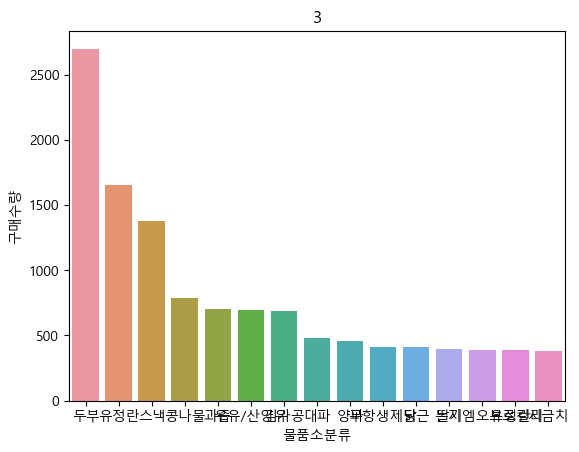

['두부', '스낵', '유정란', '과즙', '우유/산양유', '콩나물', '김가공', '양파', '당근', '오이', '라면', '즉석떡', '미역/다시마', '딸기', '식빵, 식사대용', '멥쌀', '무항생제닭', '논지엠오유정란', '돼지(중량)', '식사대용/기타', '휴지', '식육추출가공', '아이스크림', '피자/핫도그', '김', '브로컬리', '고구마', '어묵', '사과', '햄/소시지/훈제', '단과자빵', '추출/농축액', '가래떡', '냉동생선', '기름', '양배추', '간편조리면', '한우(중량)', '요구르트', '엿/양갱/기타', '보리살림(냉장)', '애호박', '두유', '기타냉동수산', '돈가스/분쇄가공', '대파', '기타양념', '앙금크림빵', '쑥', '팽이버섯', '부추', '절임', '보리살림돼지', '상추', '한우', '시금치', '월동무', '멸치류', '곡식가루', '묵', '한우(냉장)', '중파', '빙과', '만두', '죽', '프리믹스', '양념가루', '장류/기타', '치약/칫솔', '음료기타', '깻잎', '곡류차', '참외', '달래', '깐마늘', '한과/유과', '세안제/팩', '어린잎채소', '푸딩', '쌈채소모음', '화본', '패류/갑각류', '양송이버섯', '얼갈이', '미나리', '잼', '콩', '젓갈/액젓', '새송이버섯', '생채', '소스', '기타해조류', '숙주나물', '간장', '아스파라거스', '세탁비누', '찐빵,호떡,전통', '기초화장품', '느타리버섯', '참다래', '국수', '취나물', '양상추', '콩가공/기타', '유기한우', '씨리얼', '과채가루', '겨울감자', '생숙면', '유부', '표고버섯', '찹쌀', '쌈양상추', '비름나물', '국/탕(수산)', '열무', '만가닥버섯', '머위잎', '병조림/기타', '어류/연체류', '살균/세정/탈취', '로메인', '간편요리', '세발나물', '기타채소', '기타건어류', '감자', '우엉', '조림

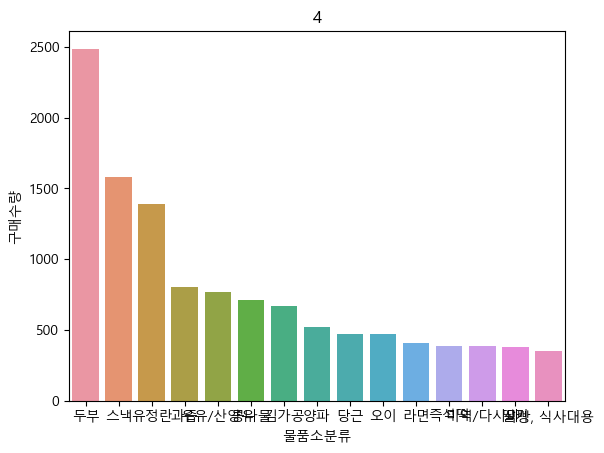

['두부', '스낵', '유정란', '오이', '과즙', '우유/산양유', '김가공', '콩나물', '양파', '당근', '중파', '돼지(중량)', '무항생제닭', '논지엠오유정란', '완숙토마토', '멥쌀', '식빵, 식사대용', '즉석떡', '라면', '간편조리면', '기름', '요구르트', '햄/소시지/훈제', '두유', '상추', '식사대용/기타', '푸딩', '김', '만두', '냉동생선', '어묵', '멸치류', '식육추출가공', '기타양념', '가래떡', '콩가공/기타', '한우(중량)', '추출/농축액', '한우', '미역/다시마', '아이스크림', '감자', '참외', '휴지', '방울토마토', '보리살림(냉장)', '사과', '단과자빵', '부추', '브로컬리', '애호박', '돈가스/분쇄가공', '시금치', '보리살림돼지', '엿/양갱/기타', '기타냉동수산', '팽이버섯', '절임', '젓갈/액젓', '묵', '앙금크림빵', '양배추', '깻잎', '피자/핫도그', '빙과', '죽', '음료기타', '한우(냉장)', '무', '얼갈이', '세안제/팩', '국수', '화본', '열무', '생숙면', '프리믹스', '무항생제돼지', '양념가루', '콩', '곡류차', '어린잎채소', '깐마늘', '양송이버섯', '미나리', '곡식가루', '간장', '기초화장품', '장류/기타', '한과/유과', '마늘쫑', '쌈채소모음', '살균/세정/탈취', '소스', '치약/칫솔', '국.찌개', '찐빵,호떡,전통', '숙주나물', '잼', '찹쌀', '간편요리', '느타리버섯', '로메인', '생채', '세탁비누', '조림', '새송이버섯', '과채가루', '참다래', '씨리얼', '세안비누', '오징어류', '기타채소', '꿀', '기타건어류', '수산가공반찬', '국/탕(수산)', '유부', '수박', '유기한우', '가지', '산딸기', '표고버섯', '바디', '냉동패류', '곰취', '주방용비누', '패류/갑각류', '취나물', '우엉', '

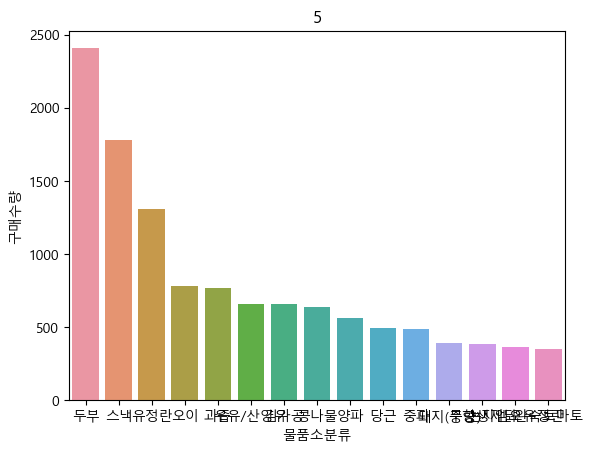

['두부', '스낵', '유정란', '오이', '김가공', '과즙', '우유/산양유', '콩나물', '빙과', '아이스크림', '애호박', '콩가공/기타', '방울토마토', '양파', '중파', '당근', '완숙토마토', '간편조리면', '기타양념', '무항생제닭', '브로컬리', '식빵, 식사대용', '감자', '식사대용/기타', '즉석떡', '라면', '깻잎', '멥쌀', '돼지(중량)', '냉동생선', '어묵', '논지엠오유정란', '요구르트', '보리살림돼지', '가지', '햄/소시지/훈제', '미역/다시마', '푸딩', '기름', '김', '단과자빵', '한우(중량)', '두유', '팽이버섯', '가래떡', '앙금크림빵', '엿/양갱/기타', '상추', '추출/농축액', '돈가스/분쇄가공', '멸치류', '양배추', '묵', '사과', '절임', '식육추출가공', '국수', '보리살림(냉장)', '음료기타', '한우(냉장)', '마늘쫑', '숙주나물', '참외', '양념가루', '기타냉동수산', '부추', '죽', '만두', '풋고추', '시금치', '얼갈이', '생숙면', '한우', '무', '피자/핫도그', '소스', '치약/칫솔', '프리믹스', '장류/기타', '콩', '휴지', '간편요리', '기타건어류', '어린잎채소', '곡류차', '기초화장품', '열무', '블루베리', '화본', '젓갈/액젓', '양송이버섯', '곡식가루', '깐마늘', '수박', '살균/세정/탈취', '꽈리고추', '세탁비누', '잼', '씨리얼', '새송이버섯', '간장', '쌈채소모음', '생채', '세안제/팩', '한과/유과', '풋콩', '기타생활용품', '찰옥수수', '유부', '느타리버섯', '국/탕(수산)', '미니단호박', '로메인', '세안비누', '찹쌀', '조림', '유기한우', '수산가공반찬', '병조림/기타', '국.찌개', '양상추', '잎꽃차', '참다래', '헤어', '바디', '기타채소', '오징어류', '자색양파', '보리', '발효음

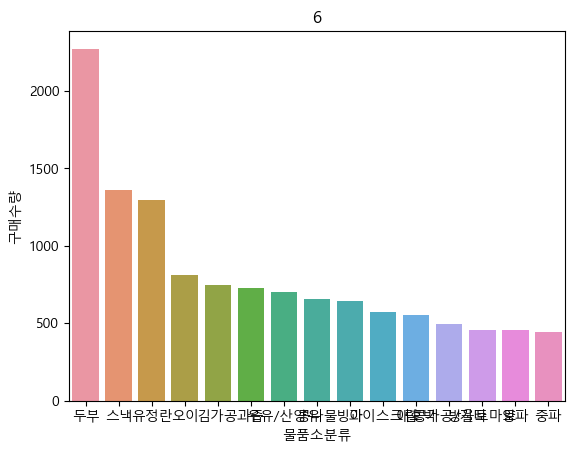

['두부', '스낵', '유정란', '우유/산양유', '과즙', '오이', '간편조리면', '김가공', '콩가공/기타', '콩나물', '아이스크림', '빙과', '무항생제닭', '가지', '애호박', '라면', '식빵, 식사대용', '방울토마토', '즉석떡', '중파', '식육추출가공', '당근', '식사대용/기타', '논지엠오유정란', '양파', '멥쌀', '찰옥수수', '냉동생선', '햄/소시지/훈제', '국수', '푸딩', '돼지(중량)', '기름', '가래떡', '음료기타', '브로컬리', '기타양념', '앙금크림빵', '요구르트', '어묵', '생숙면', '돈가스/분쇄가공', '미역/다시마', '완숙토마토', '단과자빵', '상추', '복숭아', '두유', '감자', '양배추', '묵', '멸치류', '깻잎', '김', '엿/양갱/기타', '보리살림돼지', '절임', '무', '프리믹스', '한우(중량)', '한우(냉장)', '추출/농축액', '양념가루', '만두', '휴지', '장류/기타', '부추', '보리살림(냉장)', '한우', '팽이버섯', '기타냉동수산', '청양고추', '콩', '기초화장품', '곡식가루', '젓갈/액젓', '블루베리', '소스', '죽', '간편요리', '피자/핫도그', '세탁비누', '꽈리고추', '치약/칫솔', '자두', '풋고추', '곡류차', '숙주나물', '찹쌀', '수박', '양념육', '열무', '무항생제돼지', '오이맛풋고추', '토종닭', '어린잎채소', '세안제/팩', '잼', '참외', '깐마늘', '기타생활용품', '느타리버섯', '미니단호박', '건재', '새송이버섯', '세안비누', '쌈채소모음', '양송이버섯', '시금치', '기타건어류', '파프리카', '장려품', '화본', '발효음료', '자색양파', '씨리얼', '선식/생식', '스테인리스', '로메인', '헤어', '오징어류', '국.찌개', '수산가공반찬', '유기한우', '미나리', '병조림/기타', '유아/썬크림', '바디', '생

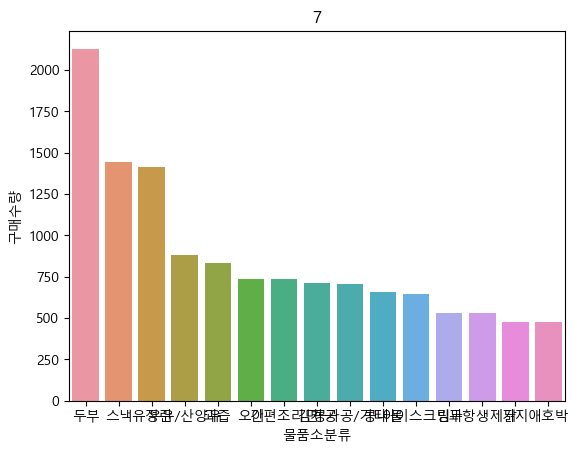

['두부', '유정란', '스낵', '우유/산양유', '과즙', '콩가공/기타', '김가공', '식사대용/기타', '오이', '콩나물', '아이스크림', '간편조리면', '가지', '빙과', '중파', '식빵, 식사대용', '애호박', '식육추출가공', '멥쌀', '무항생제닭', '냉동생선', '양파', '당근', '방울토마토', '라면', '햄/소시지/훈제', '돼지(중량)', '멸치류', '두유', '완숙토마토', '즉석떡', '기타양념', '미역/다시마', '어묵', '양배추', '가래떡', '국수', '음료기타', '푸딩', '복숭아', '요구르트', '기름', '묵', '논지엠오유정란', '사과', '돈가스/분쇄가공', '김', '절임', '단과자빵', '감자', '만두', '기타냉동수산', '깻잎', '한우', '한우(중량)', '생숙면', '무', '보리살림(냉장)', '양념가루', '젓갈/액젓', '죽', '앙금크림빵', '한우(냉장)', '팽이버섯', '피자/핫도그', '프리믹스', '포도(혼합포도)', '보리살림돼지', '청양고추', '수산가공반찬', '추출/농축액', '장류/기타', '휴지', '기타건어류', '숙주나물', '곡류차', '콩', '꽈리고추', '세탁비누', '무화과', '잼', '치약/칫솔', '곡식가루', '엿/양갱/기타', '부추', '건강차', '소스', '찰옥수수', '상추', '파프리카', '간편요리', '무항생제돼지', '고구마', '어린잎채소', '기초화장품', '느타리버섯', '찹쌀', '양송이버섯', '오징어류', '새송이버섯', '미니단호박', '씨리얼', '바디', '국/탕(수산)', '양념육', '쌈채소모음', '간장', '화본', '세안제/팩', '주방용비누', '발효음료', '국.찌개', '살균/세정/탈취', '깐마늘', '미나리', '선식/생식', '홍고추', '가시오이', '조림', '풋고추', '세안비누', '솔부추', '한과/유과', '과채가루', '오이맛풋고추', '페스츄리류', '유기한우'

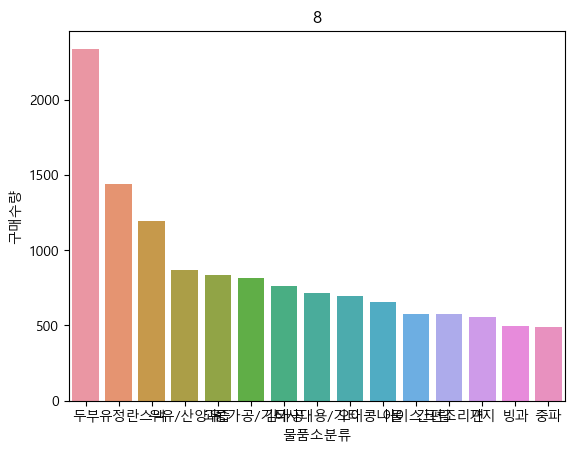

['두부', '유정란', '스낵', '김가공', '콩나물', '과즙', '우유/산양유', '멥쌀', '냉동생선', '송편', '사과', '오이', '가지', '중파', '양파', '라면', '포도(혼합포도)', '식빵, 식사대용', '식사대용/기타', '음료기타', '기름', '논지엠오유정란', '한과/유과', '단과자빵', '돼지(중량)', '무항생제닭', '미역/다시마', '한우(중량)', '가래떡', '애호박', '요구르트', '기타양념', '햄/소시지/훈제', '양배추', '아이스크림', '추출/농축액', '간편요리', '어묵', '휴지', '식육추출가공', '한우', '두유', '부추', '김', '감자', '깻잎', '보리살림돼지', '팽이버섯', '엿/양갱/기타', '고구마', '당근', '돈가스/분쇄가공', '푸딩', '만두', '절임', '숙주나물', '프리믹스', '즉석떡', '복숭아', '곡식가루', '앙금크림빵', '무', '기타냉동수산', '멸치류', '콩가공/기타', '한우(냉장)', '보리살림(냉장)', '배', '황태류', '콩', '양념가루', '묵', '죽', '피자/핫도그', '양송이버섯', '쌈채소모음', '청양고추', '젓갈/액젓', '화본', '간편조리면', '잼', '새송이버섯', '느타리버섯', '완숙토마토', '표고버섯', '장류/기타', '어린잎채소', '곡류차', '치약/칫솔', '수산가공반찬', '면/기타', '국.찌개', '간장', '소스', '세탁비누', '빙과', '기초화장품', '기타건어류', '삶은고사리/손질', '건강차', '유기한우', '깐마늘', '도라지/손질', '미니단호박', '방울토마토', '찹쌀', '국수', '상추', '도라지', '국/탕(수산)', '생숙면', '세안비누', '살균/세정/탈취', '미나리', '풋고추', '메론', '과채가루', '가시오이', '연근', '파프리카', '청경채', '세안제/팩', '주방용비누', '조림', '우엉', '밤', '페스츄리류', '대파', '

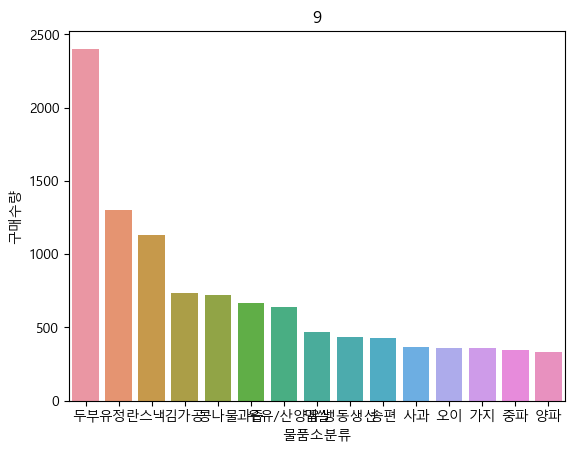

['두부', '유정란', '스낵', '콩나물', '우유/산양유', '김가공', '과즙', '오이', '논지엠오유정란', '멥쌀', '양파', '식사대용/기타', '깻잎', '김', '식빵, 식사대용', '가래떡', '라면', '사과', '돼지(중량)', '무', '단과자빵', '추출/농축액', '미역/다시마', '애호박', '햄/소시지/훈제', '무항생제닭', '기름', '어묵', '냉동생선', '식육추출가공', '젓갈/액젓', '요구르트', '귤(조생)', '팽이버섯', '감자', '두유', '기초화장품', '즉석떡', '한우(중량)', '상추', '중파', '절임', '앙금크림빵', '만두', '기타냉동수산', '기타양념', '시금치', '멸치류', '아이스크림', '한우', '고구마', '보리살림돼지', '휴지', '엿/양갱/기타', '한우(냉장)', '숙주나물', '푸딩', '돈가스/분쇄가공', '피자/핫도그', '부추', '보리살림(냉장)', '음료기타', '가지', '죽', '양념가루', '화본', '묵', '양송이버섯', '장류/기타', '세안제/팩', '국/탕(수산)', '곡류차', '배', '프리믹스', '기타건어류', '국.찌개', '콩', '잼', '쌈채소모음', '어린잎채소', '조림', '곡식가루', '유아/썬크림', '얼갈이', '브로컬리', '패류/갑각류', '간편조리면', '한과/유과', '표고버섯', '간장', '치약/칫솔', '우엉', '생대추', '세탁비누', '느타리버섯', '과채가루', '소스', '살균/세정/탈취', '당근', '황태류', '바디/핸드', '찐빵,호떡,전통', '냉동패류', '청양고추', '간편요리', '수산가공반찬', '연근', '열무', '로메인', '파프리카', '오이맛풋고추', '새송이버섯', '양상추', '생강', '건강차', '국수', '깐마늘', '오징어류', '미니단호박', '바디', '연근채/세척', '꽈리고추', '청경채', '어류/연체류', '유부', '무항생제돼지', '주방용비누', 

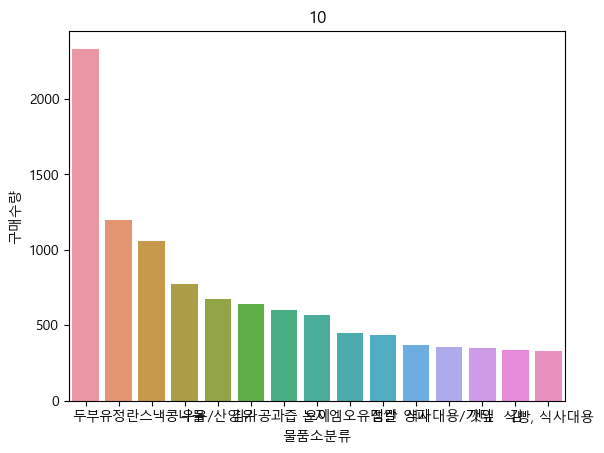

In [ ]:
for i in range(1,11):
    p2 = p1[p1['월'] == i]
    print(p2.물품소분류.to_list())
    sns.barplot(p2.head(15), x='물품소분류',y='구매수량')
    plt.title(i)
    plt.show()

In [ ]:
k = []
k2 = {}
for i in range(1,11):
    p2 = p1[p1['월'] == i].head(15)
    for j in p2.물품소분류.to_list():
        if j in k2.keys():
            k2[j] = k2[j] + 1
        else:
            k2[j] = 1 
   

In [ ]:
print(len(k2))
sku_list = pd.DataFrame({1:k2})[pd.DataFrame({1:k2})[1] == 10].index


40


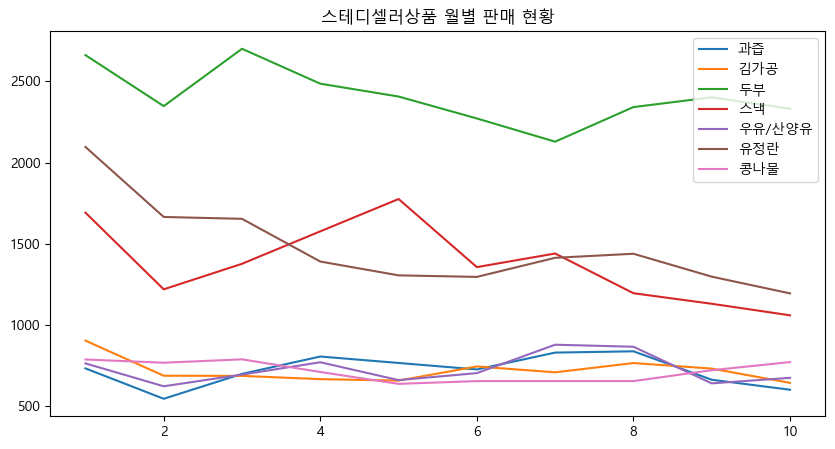

In [ ]:
plt.figure(figsize=(10,5))
for i in sku_list:
    p2 = p1[p1['물품소분류'] == i]
    p2 = p2.sort_values('월')
    plt.plot(p2['월'],p2['구매수량'], label=i)
    plt.title('스테디셀러상품 월별 판매 현황')
    plt.legend()

plt.show()

In [ ]:
p1 = df2.pivot_table(index = ['월','물품소분류'],values='구매금액',aggfunc='sum').sort_values('구매금액',ascending=False).reset_index()
p1

,월,물품소분류,구매금액
0,2,한우,16400431
1,3,유정란,14561082
2,4,유정란,14443357
3,2,추출/농축액,14411311
4,1,유정란,14300562
...,...,...,...
2943,4,자기,-15315
2944,2,말린삼잎국화나물,-15698
2945,9,성인,-25270
2946,7,전통유기,-51689


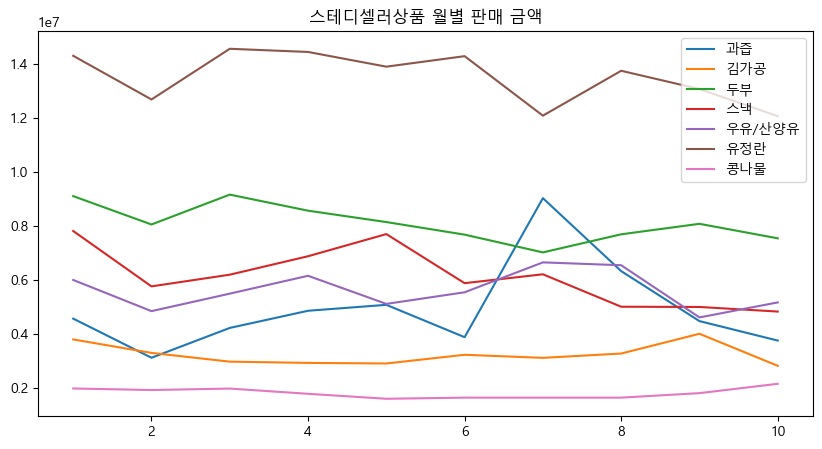

In [ ]:
plt.figure(figsize=(10,5))
for i in sku_list:
    p2 = p1[p1['물품소분류'] == i]
    p2 = p2.sort_values('월')
    plt.plot(p2['월'],p2['구매금액'], label=i)
    plt.title('스테디셀러상품 월별 판매 금액')
    plt.legend()

plt.show()

# 구매물품별 종류 2

In [ ]:
p1 = df2.pivot_table(index = ['월','물품소분류'],values='구매금액',aggfunc='sum').sort_values('구매금액',ascending=False).reset_index()
p1

,월,물품소분류,구매금액
0,2,한우,16400431
1,3,유정란,14561082
2,4,유정란,14443357
3,2,추출/농축액,14411311
4,1,유정란,14300562
...,...,...,...
2943,4,자기,-15315
2944,2,말린삼잎국화나물,-15698
2945,9,성인,-25270
2946,7,전통유기,-51689


In [ ]:
p2 = df2.pivot_table(index = ['물품소분류'],values='구매금액',aggfunc='sum').sort_values('구매금액',ascending=False).reset_index()
p2.head(10)['물품소분류']

0       유정란
1        멥쌀
2    추출/농축액
3        한우
4        두부
5    한우(중량)
6    돼지(중량)
7        스낵
8        사과
9        기름
Name: 물품소분류, dtype: object

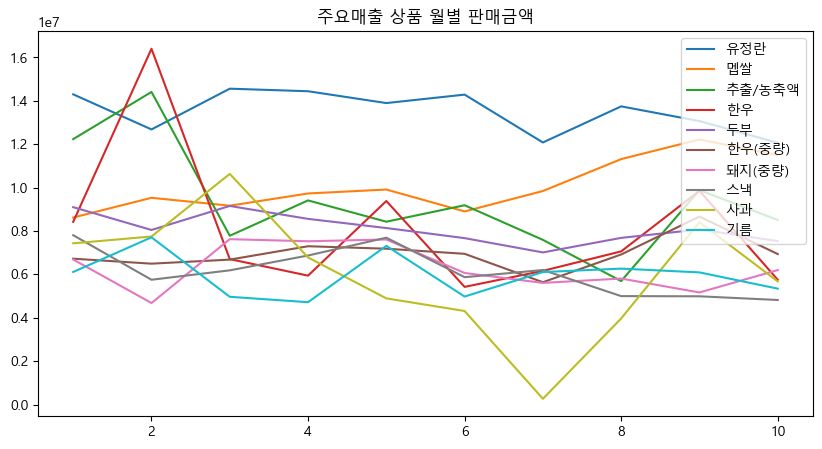

In [ ]:
plt.figure(figsize=(10,5))
for i in p2.head(10)['물품소분류']:
    p3 = p1[p1['물품소분류'] == i]
    p3 = p3.sort_values('월')
    plt.plot(p3['월'],p3['구매금액'], label=i)
    plt.title('주요매출 상품 월별 판매금액')
    plt.legend()
plt.show()

In [ ]:
p1 = df2.pivot_table(index = ['월','물품소분류'],values='구매수량',aggfunc='sum').sort_values('구매수량',ascending=False).reset_index()
p1

,월,물품소분류,구매수량
0,3,두부,2701.0
1,1,두부,2662.0
2,4,두부,2486.0
3,5,두부,2407.0
4,9,두부,2402.0
...,...,...,...
2943,6,단호박/손질,-1.0
2944,5,상황버섯,-1.0
2945,1,초석잠,-1.0
2946,2,말린삼잎국화나물,-2.0


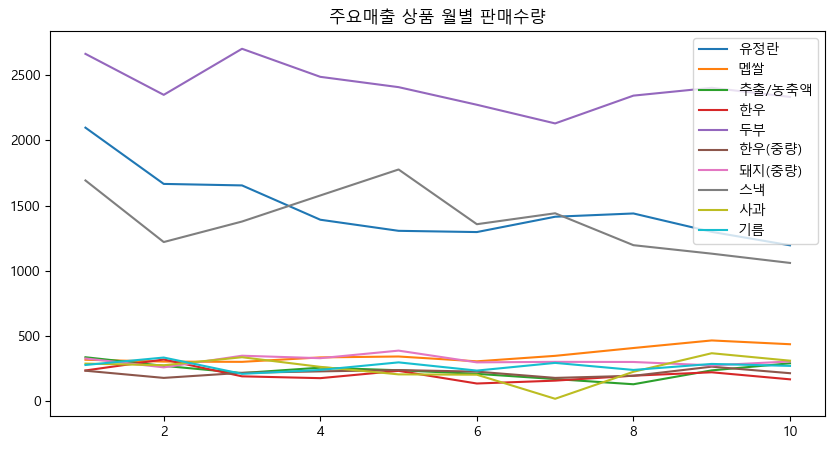

In [ ]:
plt.figure(figsize=(10,5))
for i in p2.head(10)['물품소분류']:
    p3 = p1[p1['물품소분류'] == i]
    p3 = p3.sort_values('월')
    plt.plot(p3['월'],p3['구매수량'], label=i)
    plt.title('주요매출 상품 월별 판매수량')
    plt.legend()
plt.show()

# 범주별 구매금액 / 구매횟수 차이

### 연령대별 매출 구매금액 차이

In [ ]:
def func1(x):
    if pd.isnull(x):
        return x
    elif x >= 90:
        return '90대'
    else:
        return str(x)[0] + '0대'

df2['연령대'] = df2['연령'].apply(func1)

In [ ]:
df_1 = df2['연령대'].value_counts().reset_index().sort_values('연령대')

<Axes: xlabel='연령대', ylabel='count'>

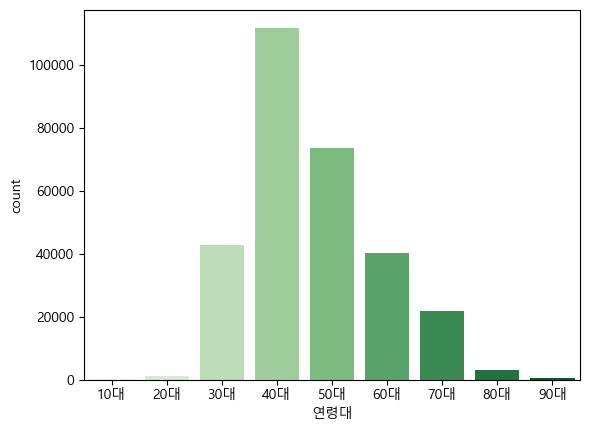

In [ ]:
sns.barplot(df_1,x='연령대', y='count', palette='Greens')

In [ ]:
p1 = df2.pivot_table(index='연령대',values='구매금액',aggfunc='sum').reset_index()
px.bar(p1,x='연령대',y='구매금액')

In [ ]:
p1 = df2.pivot_table(index='연령대',values='총구매횟수',aggfunc='sum').reset_index()
px.bar(p1,x='연령대',y='총구매횟수')

### ㅇ

In [ ]:
df2.pivot_table(index='구매매장',values='구매금액',aggfunc='mean')

,구매금액
구매매장,
매장A,11100.146243
매장B,11207.457351
매장C,10796.559156
매장D,11374.319808


In [ ]:
p3 = df2.pivot_table(index='회원번호',values='구매금액',aggfunc='sum')
p3

,구매금액
회원번호,
18613824,21059
18764160,-88827
18792000,33311
18942336,560920
18949760,2776
...,...
1644772352,85000
1644957952,25079
1670400000,13060734


In [ ]:
p3[p3['구매금액'] >= 7000000]

,구매금액
회원번호,
381879424,9002241
436681536,9559980
1670400000,13060734


In [ ]:
cond1 = df2['회원번호'].isin([381879424,436681536,1670400000])

In [ ]:
df3 = df2[~cond1]
df3

,공급일자,회원번호,조합원상태_x,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,...,배송서비스신청여부,모바일알람여부,Gold_member,공급일자2,월,요일,구매시간,label_x,총구매횟수,연령대
0,2022-01-01,272369856,정상회원,과실,과일,사과,사과/유(1.5kg),1.0,22207,매장C,...,미신청,수신,VIP,2022-01-01,1,Saturday,10,1,75,40대
1,2022-01-01,1476143616,정상회원,간식,빵,"식빵, 식사대용",아침빵(240g/8개)/매장,1.0,4403,매장C,...,미신청,미수신,normal,2022-01-01,1,Saturday,10,1,11,30대
2,2022-01-01,743192512,정상회원,채소,양념채소,생강,생강(300g),1.0,7083,매장C,...,신청,미수신,normal,2022-01-01,1,Saturday,10,1,12,50대
3,2022-01-01,176912064,정상회원,축산물,유제품,우유/산양유,유기농저지방우유(종이팩/900ml),1.0,7849,매장C,...,미신청,미수신,VIP,2022-01-01,1,Saturday,10,1,93,60대
4,2022-01-01,87592064,정상회원,양념/가루,가루,양념가루,카레(매운맛: 100g),3.0,15507,매장C,...,미신청,미수신,normal,2022-01-01,1,Saturday,10,1,48,70대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294640,2022-10-30,1110819712,정상회원,채소,뿌리채소,무,무(0.7~1kg미만),1.0,2680,매장A,...,미신청,미수신,normal,2022-10-30,10,Sunday,13,1,50,50대
294641,2022-10-30,1517953728,정상회원,채소,양념채소,쪽파,쪽파(500g),1.0,4212,매장A,...,미신청,미수신,normal,2022-10-30,10,Sunday,10,1,20,40대
294642,2022-10-30,713691392,정상회원,반찬,밑반찬,조림,우엉조림(반찬용/150g),1.0,7658,매장A,...,신청,미수신,normal,2022-10-30,10,Sunday,14,1,37,40대
294643,2022-10-30,247926336,정상회원,간식,빵,건강곡물빵,감자바게트(180g)/매장,1.0,5169,매장A,...,미신청,미수신,normal,2022-10-30,10,Sunday,16,1,12,60대


In [ ]:
p1 = df3.pivot_table(index='연령대',values='구매금액',aggfunc='sum').reset_index()
px.bar(p1,x='연령대',y='구매금액')

In [ ]:
p1 = df3.pivot_table(index = '모바일알람여부', values='구매금액',aggfunc='sum').reset_index()

In [ ]:
px.bar(p1,x='모바일알람여부',y='구매금액')

In [ ]:
p1 = df3.pivot_table(index = ['회원번호','모바일알람여부'], values='총구매횟수',aggfunc='min').reset_index()
# px.bar(p1,x='모바일알람여부',y='총구매횟수')

In [ ]:
p1.pivot_table(index = '모바일알람여부', values='총구매횟수',aggfunc='sum').reset_index()

,모바일알람여부,총구매횟수
0,미수신,110592
1,수신,36336


In [ ]:
p1 = df.pivot_table(index=['회원번호','공급일자'], values='label', aggfunc='min').reset_index()
p2 = p1.pivot_table(index='회원번호', values='label', aggfunc='sum').reset_index()
member2 = pd.merge(member,p2,on='회원번호',how='left').rename(columns={'label':'총구매횟수'})

In [ ]:
p1 = member2.pivot_table(index='모바일알람여부',values='총구매횟수',aggfunc='mean')
px.bar(p1)

,총구매횟수
모바일알람여부,
.,10.381301
수신,40.966741


In [ ]:
member2.pivot_table(index='모바일알람여부',values='총구매횟수',aggfunc='count')

,총구매횟수
모바일알람여부,
.,10653
수신,902


In [ ]:
110492/10653

10.371914014831503

In [ ]:
36952/902

40.966740576496676

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:


# 장바구니 분석을 위한 데이터 전처리
# 회원번호와 물품명을 기준으로 그룹핑하여 각 회원의 장바구니를 생성
basket_data = df2.groupby(['회원번호', '물품대분류'])['구매수량'].sum().unstack().fillna(0)
basket_data


물품대분류,간식,건강,과실,기타,반찬,생활용품,서류,수산,양념/가루,음료,잡곡,주곡,주류,채소,축산물,학교급식
회원번호,,,,,,,,,,,,,,,,
18613824,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18764160,3.0,-1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0
18792000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
18942336,1.0,1.0,5.0,0.0,0.0,2.0,1.0,3.0,0.0,2.0,0.0,1.0,1.0,7.0,9.0,0.0
18949760,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644772352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1644957952,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1670400000,318.3,21.6,33.0,0.0,168.0,67.0,15.0,109.0,117.0,170.6,19.0,8.0,2.0,192.0,192.0,0.0


In [ ]:
# 구매 수량을 1과 0으로 변환하여 이진 행렬로 만들기
basket_data = basket_data.applymap(lambda x: 1 if x > 0 else 0)
basket_data

물품대분류,간식,건강,과실,기타,반찬,생활용품,서류,수산,양념/가루,음료,잡곡,주곡,주류,채소,축산물,학교급식
회원번호,,,,,,,,,,,,,,,,
18613824,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
18764160,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
18792000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
18942336,1,1,1,0,0,1,1,1,0,1,0,1,1,1,1,0
18949760,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644772352,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1644957952,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1670400000,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0


In [ ]:
# Apriori 알고리즘을 사용하여 빈발 항목 집합 생성
frequent_itemsets = apriori(basket_data, min_support=0.01, use_colnames=True)

# 연관 규칙 생성
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# 결과 출력
print(rules)

c:\Users\lhybi\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



        antecedents                                        consequents  \
0              (건강)                                               (간식)   
1              (간식)                                               (건강)   
2              (과실)                                               (간식)   
3              (간식)                                               (과실)   
4              (간식)                                               (기타)   
...             ...                                                ...   
1676131        (수산)  (주곡, 건강, 서류, 생활용품, 반찬, 잡곡, 과실, 간식, 양념/가루, 축산물,...   
1676132     (양념/가루)  (주곡, 건강, 서류, 생활용품, 반찬, 잡곡, 과실, 간식, 수산, 축산물, 채소...   
1676133       (축산물)  (주곡, 건강, 서류, 생활용품, 반찬, 잡곡, 과실, 간식, 수산, 양념/가루, ...   
1676134        (채소)  (주곡, 건강, 서류, 생활용품, 반찬, 잡곡, 과실, 간식, 수산, 양념/가루, ...   
1676135        (음료)  (주곡, 건강, 서류, 생활용품, 반찬, 잡곡, 과실, 간식, 수산, 양념/가루, ...   

         antecedent support  consequent support   support  confidence  \
0                  0.135006           

In [ ]:
top_rule = rules.sort_values(by='lift', ascending=False).head(10)

# 결과 출력
print("가장 연관성이 높은 규칙:")
print(top_rule)

가장 연관성이 높은 규칙:
                                 antecedents  \
1674629              (서류, 생활용품, 잡곡, 축산물, 음료)   
1621902              (서류, 생활용품, 잡곡, 축산물, 음료)   
1673385          (서류, 생활용품, 잡곡, 축산물, 채소, 음료)   
1669452  (주곡, 건강, 반찬, 과실, 간식, 수산, 양념/가루, 채소)   
1670696      (주곡, 건강, 반찬, 과실, 간식, 수산, 양념/가루)   
1619827      (주곡, 건강, 반찬, 과실, 간식, 수산, 양념/가루)   
1671745      (서류, 생활용품, 반찬, 잡곡, 축산물, 채소, 음료)   
1672336          (주곡, 건강, 수산, 간식, 과실, 양념/가루)   
1621131          (서류, 생활용품, 반찬, 잡곡, 축산물, 음료)   
1620598          (주곡, 건강, 수산, 간식, 과실, 양념/가루)   

                                 consequents  antecedent support  \
1674629  (주곡, 건강, 반찬, 과실, 간식, 수산, 양념/가루, 채소)            0.034357   
1621902      (주곡, 건강, 반찬, 과실, 간식, 수산, 양념/가루)            0.034357   
1673385      (주곡, 건강, 반찬, 과실, 간식, 수산, 양념/가루)            0.034357   
1669452              (서류, 생활용품, 잡곡, 축산물, 음료)            0.029511   
1670696          (서류, 생활용품, 잡곡, 축산물, 채소, 음료)            0.029511   
1619827              (서류, 생활용품, 잡곡, 축산물, 음료)    

In [ ]:
top_rule = rules.sort_values(by='lift', ascending=False).head(10)

# 결과 출력
print("가장 연관성이 높은 규칙:")
print(top_rule)

가장 연관성이 높은 규칙:
                                 antecedents  \
1674629              (서류, 생활용품, 잡곡, 축산물, 음료)   
1621902              (서류, 생활용품, 잡곡, 축산물, 음료)   
1673385          (서류, 생활용품, 잡곡, 축산물, 채소, 음료)   
1669452  (주곡, 건강, 반찬, 과실, 간식, 수산, 양념/가루, 채소)   
1670696      (주곡, 건강, 반찬, 과실, 간식, 수산, 양념/가루)   
1619827      (주곡, 건강, 반찬, 과실, 간식, 수산, 양념/가루)   
1671745      (서류, 생활용품, 반찬, 잡곡, 축산물, 채소, 음료)   
1672336          (주곡, 건강, 수산, 간식, 과실, 양념/가루)   
1621131          (서류, 생활용품, 반찬, 잡곡, 축산물, 음료)   
1620598          (주곡, 건강, 수산, 간식, 과실, 양념/가루)   

                                 consequents  antecedent support  \
1674629  (주곡, 건강, 반찬, 과실, 간식, 수산, 양념/가루, 채소)            0.034357   
1621902      (주곡, 건강, 반찬, 과실, 간식, 수산, 양념/가루)            0.034357   
1673385      (주곡, 건강, 반찬, 과실, 간식, 수산, 양념/가루)            0.034357   
1669452              (서류, 생활용품, 잡곡, 축산물, 음료)            0.029511   
1670696          (서류, 생활용품, 잡곡, 축산물, 채소, 음료)            0.029511   
1619827              (서류, 생활용품, 잡곡, 축산물, 음료)    

In [ ]:
df2[df2['회원번호'].duplicated()]

,공급일자,회원번호,조합원상태_x,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,...,연령,배송서비스신청여부,모바일알람여부,Gold_member,공급일자2,월,요일,구매시간,label_x,총구매횟수
58,2022-01-01,742641280,정상회원,과실,과일,사과,사과/(2kg)/대,1.0,18953,매장C,...,47.0,미신청,미수신,normal,2022-01-01,1,Saturday,18,1,11
67,2022-01-01,743192512,정상회원,축산물,유제품,요구르트,블루베리요구르트(120ml),1.0,2297,매장C,...,51.0,신청,미수신,normal,2022-01-01,1,Saturday,10,1,12
68,2022-01-01,176912064,정상회원,채소,잎/줄기채소,배추,알배기배추(1kg),1.0,4786,매장C,...,69.0,미신청,미수신,VIP,2022-01-01,1,Saturday,10,1,93
71,2022-01-01,1206815744,정상회원,간식,밀가공,만두,김치만두(500g),1.0,9381,매장C,...,42.0,미신청,수신,VIP,2022-01-01,1,Saturday,10,1,123
74,2022-01-01,1343359808,정상회원,간식,빵,"찐빵,호떡,전통",쑥찐빵(400g/5개)/매장,1.0,8615,매장C,...,49.0,미신청,수신,VIP,2022-01-01,1,Saturday,11,1,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294640,2022-10-30,1110819712,정상회원,채소,뿌리채소,무,무(0.7~1kg미만),1.0,2680,매장A,...,50.0,미신청,미수신,normal,2022-10-30,10,Sunday,13,1,50
294641,2022-10-30,1517953728,정상회원,채소,양념채소,쪽파,쪽파(500g),1.0,4212,매장A,...,44.0,미신청,미수신,normal,2022-10-30,10,Sunday,10,1,20
294642,2022-10-30,713691392,정상회원,반찬,밑반찬,조림,우엉조림(반찬용/150g),1.0,7658,매장A,...,49.0,신청,미수신,normal,2022-10-30,10,Sunday,14,1,37
294643,2022-10-30,247926336,정상회원,간식,빵,건강곡물빵,감자바게트(180g)/매장,1.0,5169,매장A,...,63.0,미신청,미수신,normal,2022-10-30,10,Sunday,16,1,12


In [7]:
sale_df

NameError: name 'sale_df' is not defined

In [ ]:
member

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,.,normal
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal
2,1000122304,정상회원,광주-기타,여,38.0,미신청,.,normal
3,1000163136,정상회원,수지구-동천동,여,73.0,미신청,.,normal
4,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,.,normal
...,...,...,...,...,...,...,...,...
11550,999682432,탈퇴,수지구-동천동,여,47.0,미신청,.,normal
11551,999721408,정상회원,수지구-동천동,여,43.0,미신청,.,normal
11552,999738112,정상회원,수지구-성복동,여,67.0,미신청,.,normal
11553,999754816,정상회원,수지구-상현동,여,44.0,신청,.,normal


In [ ]:
member['모바일알람여부'].replace('.','미수신', inplace=True)

In [ ]:
def func1(x):
    if pd.isnull(x):
        return x
    elif x >= 90:
        return '90대'
    else:
        return str(x)[0] + '0대'

member['연령대'] = member['연령'].apply(func1)
member.head(2)

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,연령대
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,미수신,normal,50대
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,미수신,normal,30대


In [ ]:
cond1 = member['조합원상태'] != '정상회원'
t1 = member[cond1] 
t1.pivot_table(index='연령대',values='조합원상태', aggfunc='count')

,조합원상태
연령대,
30대,17
40대,51
50대,31
60대,24
70대,14
80대,5


In [ ]:
t1 = member[~cond1] 
t1.pivot_table(index='연령대',values='조합원상태', aggfunc='count')

,조합원상태
연령대,
10대,1
20대,52
30대,2120
40대,4429
50대,2515
60대,1431
70대,722
80대,131
90대,10


In [ ]:
t1

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,연령대
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,미수신,normal,50대
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,미수신,normal,30대
2,1000122304,정상회원,광주-기타,여,38.0,미신청,미수신,normal,30대
3,1000163136,정상회원,수지구-동천동,여,73.0,미신청,미수신,normal,70대
4,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,미수신,normal,40대
...,...,...,...,...,...,...,...,...,...
11549,999654592,정상회원,기타-기타,여,47.0,미신청,미수신,normal,40대
11551,999721408,정상회원,수지구-동천동,여,43.0,미신청,미수신,normal,40대
11552,999738112,정상회원,수지구-성복동,여,67.0,미신청,미수신,normal,60대
11553,999754816,정상회원,수지구-상현동,여,44.0,신청,미수신,normal,40대


(array([5425., 1540.,  965.,  705.,  612.,  528.,  459.,  457.,  458.,
         406.]),
 array([  0. ,  30.2,  60.4,  90.6, 120.8, 151. , 181.2, 211.4, 241.6,
        271.8, 302. ]),
 <BarContainer object of 10 artists>)

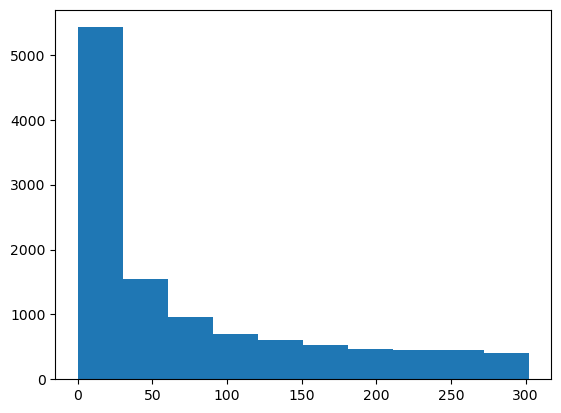

In [ ]:
p1 = df2['공급일자2'].max() - df.pivot_table(index='회원번호',values='공급일자2',aggfunc='max')
plt.hist(p1['공급일자2'].apply(lambda x: int(str(x).split(' ')[0])))

In [ ]:
df.pivot_table(index='월',values='구매금액',aggfunc='sum')

,구매금액
월,
1,340854710
2,335517655
3,318701266
4,307300967
5,319699543
6,307472697
7,359811419
8,333950632
9,336870046


In [ ]:
F_list = []
def func2(x):
    if x >= 120:
        return '잠수고객'
    else:
        return '일반고객'
    
p1['회원상태'] = p1['공급일자2'].apply(func2)

In [ ]:
t1 = pd.merge(t1,p1[['회원상태','회원번호']],on='회원번호')
t1['label'] = 1

In [ ]:
t1 = t1.drop(columns=('회원상태_y')).rename(columns={'회원상태_x':'회원상태'})

In [ ]:
t2 = t1[t1['회원상태'] == '일반고객']
t2.pivot_table(index='모바일알람여부',values='label',aggfunc='sum')/len(t2)

,label
모바일알람여부,
미수신,0.911277
수신,0.088723


In [ ]:
t2 = t1[t1['회원상태'] != '일반고객']
t2.pivot_table(index='모바일알람여부',values='label',aggfunc='sum')/len(t2)

,label
모바일알람여부,
미수신,0.952582
수신,0.047418


In [ ]:
import scipy.stats as st
st.chi2_contingency(pd.crosstab(t1['회원상태'],t1['배송서비스신청여부']))
# 배송서비스신청여부와 회원의 상태는 독립이 아니다.

Chi2ContingencyResult(statistic=337.39781190156043, pvalue=2.3528117798972286e-75, dof=1, expected_freq=array([[7788.43266451,  777.56733549],
       [2588.56733549,  258.43266451]]))

In [ ]:
st.chi2_contingency(pd.crosstab(t1['회원상태'],t1['연령대']))
# 연령대와 회원상태는 독립이 아니다

Chi2ContingencyResult(statistic=35.762221624615876, pvalue=1.94102424884781e-05, dof=8, expected_freq=array([[7.50503900e-01, 3.90262028e+01, 1.59106827e+03, 3.32398177e+03,
        1.88751731e+03, 1.07397108e+03, 5.41863816e+02, 9.83160109e+01,
        7.50503900e+00],
       [2.49496100e-01, 1.29737972e+01, 5.28931733e+02, 1.10501823e+03,
        6.27482692e+02, 3.57028919e+02, 1.80136184e+02, 3.26839891e+01,
        2.49496100e+00]]))

In [ ]:
pd.crosstab(t1['회원상태'],t1['연령대'])

연령대,10대,20대,30대,40대,50대,60대,70대,80대,90대
회원상태,,,,,,,,,
일반고객,1,37,1520,3283,1926,1103,583,104,7
잠수고객,0,15,600,1146,589,328,139,27,3


In [ ]:
cond1 = t1['배송서비스신청여부'] == '신청'
cond2 = t1['모바일알람여부'] == '수신'
t1['온라인서비스'] = 'X'
t1.loc[cond1|cond2,'온라인서비스'] = 'O'
t1['온라인서비스'].value_counts()

온라인서비스
X    9487
O    1926
Name: count, dtype: int64

In [ ]:
print(st.chi2_contingency(pd.crosstab(t1['온라인서비스'],t1['연령대'])))
pd.crosstab(t1['온라인서비스'],t1['연령대'])

Chi2ContingencyResult(statistic=55.24008010258815, pvalue=3.965090469058087e-09, dof=8, expected_freq=array([[1.68784506e-01, 8.77679432e+00, 3.57823153e+02, 7.47546578e+02,
        4.24493033e+02, 2.41530628e+02, 1.21862413e+02, 2.21107703e+01,
        1.68784506e+00],
       [8.31215494e-01, 4.32232057e+01, 1.76217685e+03, 3.68145342e+03,
        2.09050697e+03, 1.18946937e+03, 6.00137587e+02, 1.08889230e+02,
        8.31215494e+00]]))


연령대,10대,20대,30대,40대,50대,60대,70대,80대,90대
온라인서비스,,,,,,,,,
O,0,6,294,796,509,214,91,15,1
X,1,46,1826,3633,2006,1217,631,116,9


In [ ]:
pd.crosstab(t1['모바일알람여부'],t1['연령대'])

연령대,10대,20대,30대,40대,50대,60대,70대,80대,90대
모바일알람여부,,,,,,,,,
미수신,1,52,1955,4027,2265,1379,702,126,9
수신,0,0,165,402,250,52,20,5,1


In [ ]:
df3 = df2.dropna()
st.ranksums(df3['총구매횟수'],df3['연령'])
# 두 집단간에 선형성이 있다.

RanksumsResult(statistic=-19.465057445340133, pvalue=2.1725090511917117e-84)

In [ ]:
p4 = df3.pivot_table(index='회원번호',values='구매금액',aggfunc='sum').reset_index()
df3 = pd.merge(df3,p4,on='회원번호',how='left')

In [ ]:
st.ranksums(df3['구매금액_y'],df3['연령'])

RanksumsResult(statistic=-86.2163087236426, pvalue=0.0)

In [ ]:
p1 = df2.pivot_table(index=['회원번호','공급일자'], values='label_x',aggfunc='min')
p2 = p1.pivot_table(index='회원번호',values='label_x',aggfunc='sum').reset_index()

In [ ]:
m1 = pd.merge(member,p2,on='회원번호',how='left').rename(columns={'label_x':'총구매금액'})
m1

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,연령대,총구매금액
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,미수신,normal,50대,1
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,미수신,normal,30대,1
2,1000122304,정상회원,광주-기타,여,38.0,미신청,미수신,normal,30대,15
3,1000163136,정상회원,수지구-동천동,여,73.0,미신청,미수신,normal,70대,4
4,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,미수신,normal,40대,28
...,...,...,...,...,...,...,...,...,...,...
11550,999682432,탈퇴,수지구-동천동,여,47.0,미신청,미수신,normal,40대,1
11551,999721408,정상회원,수지구-동천동,여,43.0,미신청,미수신,normal,40대,3
11552,999738112,정상회원,수지구-성복동,여,67.0,미신청,미수신,normal,60대,9
11553,999754816,정상회원,수지구-상현동,여,44.0,신청,미수신,normal,40대,21


In [ ]:
m2 = pd.merge(m1,sale_df[['회원번호','월']],on='회원번호',how='left')

In [ ]:
m2 = m2.pivot_table(index='월',values='총구매금액',aggfunc='sum').reset_index()
m2

NameError: name 'm2' is not defined

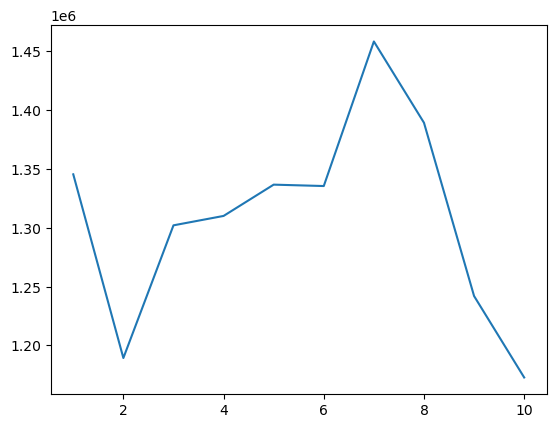

In [ ]:
# 총구매금액 x 총구매횟수
plt.plot(m2['월'],m2['총구매금액'])

In [ ]:
m2

NameError: name 'm2' is not defined